In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set plotting style
plt.style.use('fivethirtyeight')
sns.set_theme(style="whitegrid")

In [3]:
# Data Loading and Preprocessing
# Assuming similar datasets as in the example
print("Loading datasets...")
analysis_df = pd.read_csv('/Users/priyeshgupta/sandbox/strategy-data-analysis/nifty-3weeks-expiry/data/nifty_2014_analysis_results.csv')
vix_df = pd.read_csv('/Users/priyeshgupta/sandbox/strategy-data-analysis/nifty-3weeks-expiry/data/NSE_INDIAVIX_2014.csv')
nifty_df = pd.read_csv('/Users/priyeshgupta/sandbox/strategy-data-analysis/nifty-3weeks-expiry/data/NSE_NIFTY_2014.csv')

# Display the first few rows of each dataset
print("Nifty Analysis Results:")
print(analysis_df.head())

print("\nIndia VIX Data:")
print(vix_df.head())

print("\nNifty Hourly Data:")
print(nifty_df.head())

Loading datasets...
Nifty Analysis Results:
  monday_date monday_day  monday_open  monday_low  monday_high  monday_close  monday_volume expiry_date expiry_day  expiry_open  expiry_low  expiry_high  expiry_close  expiry_volume  3_week_high  3_week_low  monday_close_minus_expiry_close  3_week_high_minus_monday_close  3_week_low_minus_monday_close  3_week_high_minus_thursday_close  3_week_low_minus_thursday_close
0  2014-08-18     Monday      7788.40     7779.20      7826.15       7822.95              0  2014-09-04   Thursday      8114.25     8081.00      8114.80       8089.00              0      8121.65     7779.20                          -266.05                          298.70                         -43.75                             32.65                          -309.80
1  2014-08-25     Monday      7934.60     7927.75      7957.70       7940.55              0  2014-09-11   Thursday      8118.65     8096.25      8127.95       8114.75              0      8174.55     7871.65          

In [4]:
# Convert date columns to datetime
analysis_df['monday_date'] = pd.to_datetime(analysis_df['monday_date'])
analysis_df['expiry_date'] = pd.to_datetime(analysis_df['expiry_date'])
vix_df['datetime'] = pd.to_datetime(vix_df['datetime'])
nifty_df['time'] = pd.to_datetime(nifty_df['time'])

# Extract date components
vix_df['date'] = vix_df['datetime'].dt.date
nifty_df['date'] = nifty_df['time'].dt.date
nifty_df['hour'] = nifty_df['time'].dt.hour

# Filter first hour data
first_hour_data = nifty_df[nifty_df['hour'] == nifty_df['time'].dt.hour.min()]

# Check for missing values and handle them
print("\nChecking for missing values...")
print("Missing values in Nifty Analysis Results:")
print(analysis_df.isnull().sum())

print("\nMissing values in India VIX Data:")
print(vix_df.isnull().sum())

print("\nMissing values in Nifty Hourly Data:")
print(nifty_df.isnull().sum())

# Handle missing values
analysis_df = analysis_df.dropna()

nifty_df = nifty_df.dropna()


Checking for missing values...
Missing values in Nifty Analysis Results:
monday_date                         0
monday_day                          0
monday_open                         0
monday_low                          0
monday_high                         0
monday_close                        0
monday_volume                       0
expiry_date                         0
expiry_day                          0
expiry_open                         0
expiry_low                          0
expiry_high                         0
expiry_close                        0
expiry_volume                       0
3_week_high                         0
3_week_low                          0
monday_close_minus_expiry_close     0
3_week_high_minus_monday_close      0
3_week_low_minus_monday_close       0
3_week_high_minus_thursday_close    0
3_week_low_minus_thursday_close     0
dtype: int64

Missing values in India VIX Data:
datetime         0
open             0
high             0
low              0
clos

In [5]:
vix_df

,datetime,open,high,low,close,Volume,Volume MA,date
0,2014-09-09 09:15:00+05:30,12.7925,13.0075,11.0125,12.8700,NaN,NaN,2014-09-09
1,2014-09-09 10:15:00+05:30,12.8650,13.0100,12.8300,12.9700,NaN,NaN,2014-09-09
2,2014-09-09 11:15:00+05:30,12.9775,13.0425,12.8825,12.9275,NaN,NaN,2014-09-09
3,2014-09-09 12:15:00+05:30,12.9325,12.9650,12.7700,12.9175,NaN,NaN,2014-09-09
4,2014-09-09 13:15:00+05:30,12.9200,13.0050,12.8075,12.8550,NaN,NaN,2014-09-09
...,...,...,...,...,...,...,...,...
18150,2025-03-19 09:15:00+05:30,13.2100,13.5725,12.5850,13.3525,NaN,NaN,2025-03-19
18151,2025-03-19 10:15:00+05:30,13.3450,13.4425,13.2550,13.3750,NaN,NaN,2025-03-19
18152,2025-03-19 11:15:00+05:30,13.3600,13.4650,13.3275,13.4125,NaN,NaN,2025-03-19
18153,2025-03-19 12:15:00+05:30,13.4050,13.4325,13.2875,13.3750,NaN,NaN,2025-03-19


In [6]:
# Calculate additional statistics for analysis
print("\nCalculating additional statistics...")
analysis_df['range_3week'] = analysis_df['3_week_high'] - analysis_df['3_week_low']
analysis_df['monday_to_high_range'] = analysis_df['3_week_high'] - analysis_df['monday_close']
analysis_df['monday_to_low_range'] = analysis_df['monday_close'] - analysis_df['3_week_low']
analysis_df['is_high_reached'] = analysis_df['monday_to_high_range'] > 0
analysis_df['is_low_reached'] = analysis_df['monday_to_low_range'] > 0

# Calculate range as percentage of Monday's close
analysis_df['range_pct'] = analysis_df['range_3week'] / analysis_df['monday_close'] * 100
analysis_df['high_range_pct'] = analysis_df['monday_to_high_range'] / analysis_df['monday_close'] * 100
analysis_df['low_range_pct'] = analysis_df['monday_to_low_range'] / analysis_df['monday_close'] * 100

# Create temporal features
analysis_df['week_of_year'] = analysis_df['monday_date'].dt.isocalendar().week
analysis_df['month'] = analysis_df['monday_date'].dt.month
analysis_df['year'] = analysis_df['monday_date'].dt.year
analysis_df['quarter'] = (analysis_df['month'] - 1) // 3 + 1

# Create COVID era flag (pre-COVID: before March 2020, post-COVID: March 2020 onwards)
covid_cutoff = pd.to_datetime('2020-03-01')
analysis_df['covid_era'] = np.where(analysis_df['monday_date'] < covid_cutoff, 'Pre-COVID', 'Post-COVID')

# Basic statistics of the analysis results
print("\nBasic statistics of the analysis results:")
print(analysis_df.describe())

# Range statistics by COVID era
print("\nRange statistics by COVID era:")
covid_range_stats = analysis_df.groupby('covid_era')[['range_pct', 'high_range_pct', 'low_range_pct']].describe()
print(covid_range_stats)


Calculating additional statistics...

Basic statistics of the analysis results:
                         monday_date   monday_open    monday_low   monday_high  monday_close  monday_volume                    expiry_date   expiry_open    expiry_low   expiry_high  expiry_close  expiry_volume   3_week_high    3_week_low  monday_close_minus_expiry_close  3_week_high_minus_monday_close  3_week_low_minus_monday_close  3_week_high_minus_thursday_close  3_week_low_minus_thursday_close  range_3week  monday_to_high_range  monday_to_low_range   range_pct  high_range_pct  low_range_pct  week_of_year       month         year     quarter
count                            518    518.000000    518.000000    518.000000    518.000000   5.180000e+02                            518    518.000000    518.000000    518.000000    518.000000   5.180000e+02    518.000000    518.000000                       518.000000                      518.000000                     518.000000                        518.000000 

In [7]:
analysis_df

,monday_date,monday_day,monday_open,monday_low,monday_high,monday_close,monday_volume,expiry_date,expiry_day,expiry_open,expiry_low,expiry_high,expiry_close,expiry_volume,3_week_high,3_week_low,monday_close_minus_expiry_close,3_week_high_minus_monday_close,3_week_low_minus_monday_close,3_week_high_minus_thursday_close,3_week_low_minus_thursday_close,range_3week,monday_to_high_range,monday_to_low_range,is_high_reached,is_low_reached,range_pct,high_range_pct,low_range_pct,week_of_year,month,year,quarter,covid_era
0,2014-08-18,Monday,7788.40,7779.20,7826.15,7822.95,0,2014-09-04,Thursday,8114.25,8081.00,8114.80,8089.00,0,8121.65,7779.20,-266.05,298.70,-43.75,32.65,-309.80,342.45,298.70,43.75,True,True,4.377505,3.818253,0.559252,34,8,2014,3,Pre-COVID
1,2014-08-25,Monday,7934.60,7927.75,7957.70,7940.55,0,2014-09-11,Thursday,8118.65,8096.25,8127.95,8114.75,0,8174.55,7871.65,-174.20,234.00,-68.90,59.80,-243.10,302.90,234.00,68.90,True,True,3.814597,2.946899,0.867698,35,8,2014,3,Pre-COVID
2,2014-09-01,Monday,7994.70,7984.00,8022.70,8019.80,0,2014-09-18,Thursday,7958.55,7939.70,8051.35,8037.00,0,8174.55,7936.95,-17.20,154.75,-82.85,137.55,-100.05,237.60,154.75,82.85,True,True,2.962667,1.929599,1.033068,36,9,2014,3,Pre-COVID
3,2014-09-08,Monday,8133.45,8126.15,8146.70,8146.20,0,2014-09-25,Thursday,8013.55,7980.70,8019.30,7990.05,0,8174.55,7936.95,156.15,28.35,-209.25,184.50,-53.10,237.60,28.35,209.25,True,True,2.916697,0.348015,2.568682,37,9,2014,3,Pre-COVID
4,2014-09-15,Monday,8077.30,8030.00,8077.30,8046.30,0,2014-10-01,Wednesday,7970.00,7948.40,7977.50,7962.40,0,8159.75,7884.85,83.90,113.45,-161.45,197.35,-77.55,274.90,113.45,161.45,True,True,3.416477,1.409965,2.006512,38,9,2014,3,Pre-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2025-02-03,Monday,23322.10,23222.00,23345.15,23263.70,99519621,2025-02-20,Thursday,22836.20,22812.75,22898.10,22873.75,56915459,23807.30,22725.45,389.95,543.60,-538.25,933.55,-148.30,1081.85,543.60,538.25,True,True,4.650378,2.336688,2.313690,6,2,2025,1,Post-COVID
514,2025-02-10,Monday,23568.60,23366.10,23568.60,23373.10,64315677,2025-02-27,Thursday,22585.35,22530.00,22613.30,22542.30,64709312,23568.60,22529.80,830.80,195.50,-843.30,1026.30,-12.50,1038.80,195.50,843.30,True,True,4.444425,0.836432,3.607994,7,2,2025,1,Post-COVID
515,2025-02-17,Monday,22835.50,22725.45,22874.75,22756.85,56675282,2025-03-06,Thursday,22487.15,22245.85,22491.30,22331.60,100573659,22996.20,21964.60,425.25,239.35,-792.25,664.60,-367.00,1031.60,239.35,792.25,True,True,4.533141,1.051771,3.481369,8,2,2025,1,Post-COVID
516,2025-02-24,Monday,22613.25,22560.30,22668.05,22572.15,54839950,2025-03-13,Thursday,22556.00,22460.40,22556.00,22545.10,82042900,22676.75,21964.60,27.05,104.60,-607.55,131.65,-580.50,712.15,104.60,607.55,True,True,3.154994,0.463403,2.691591,9,2,2025,1,Post-COVID




Part 1: Overall Market Analysis



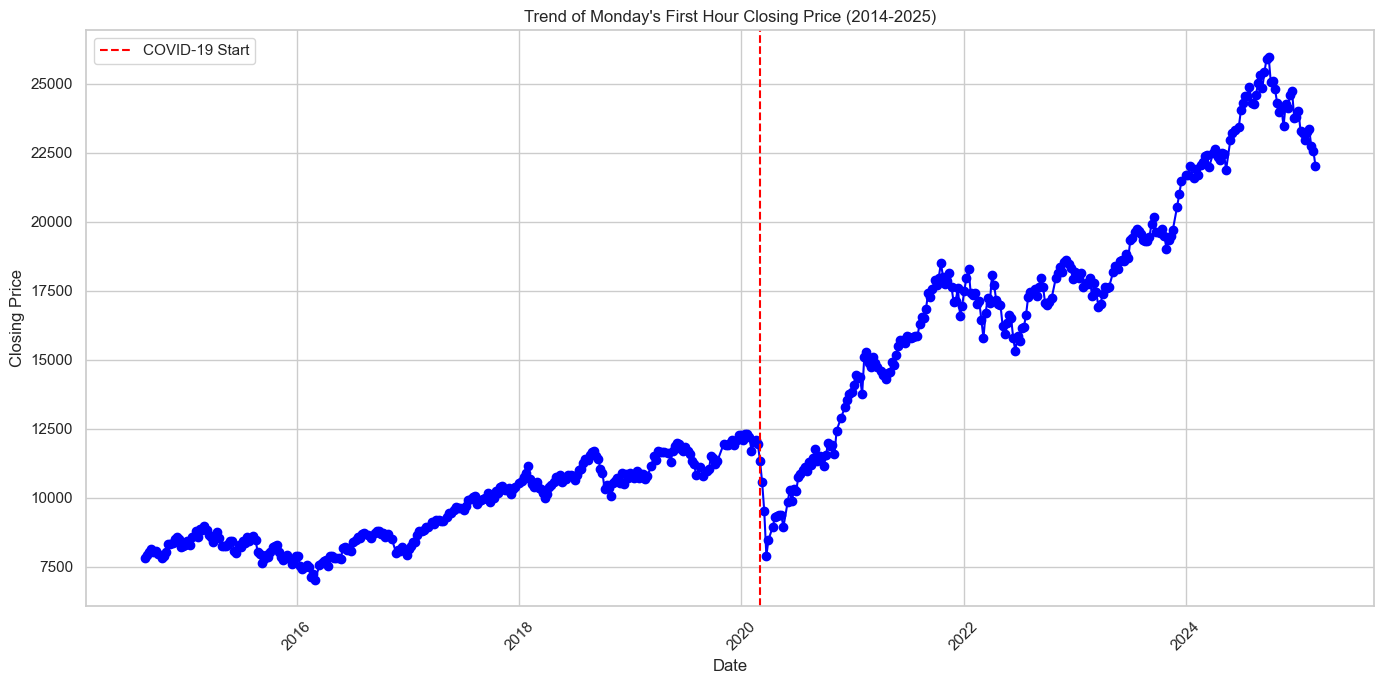

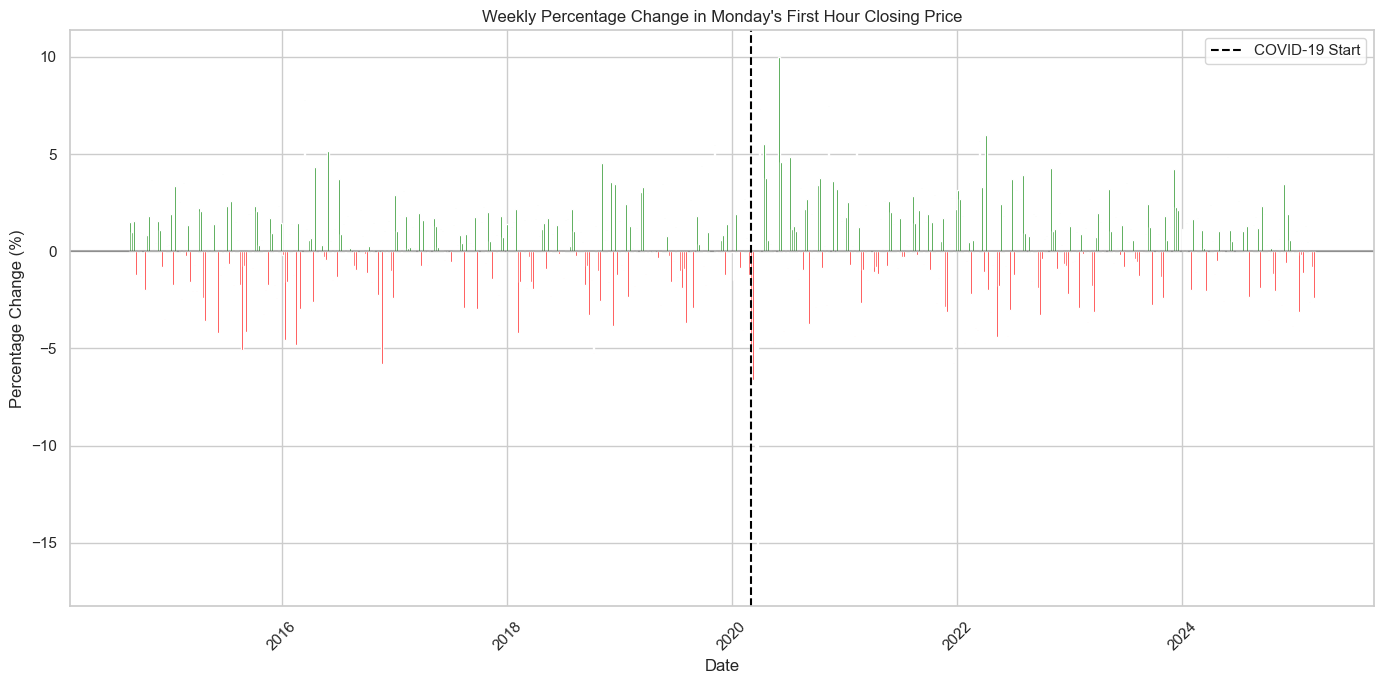

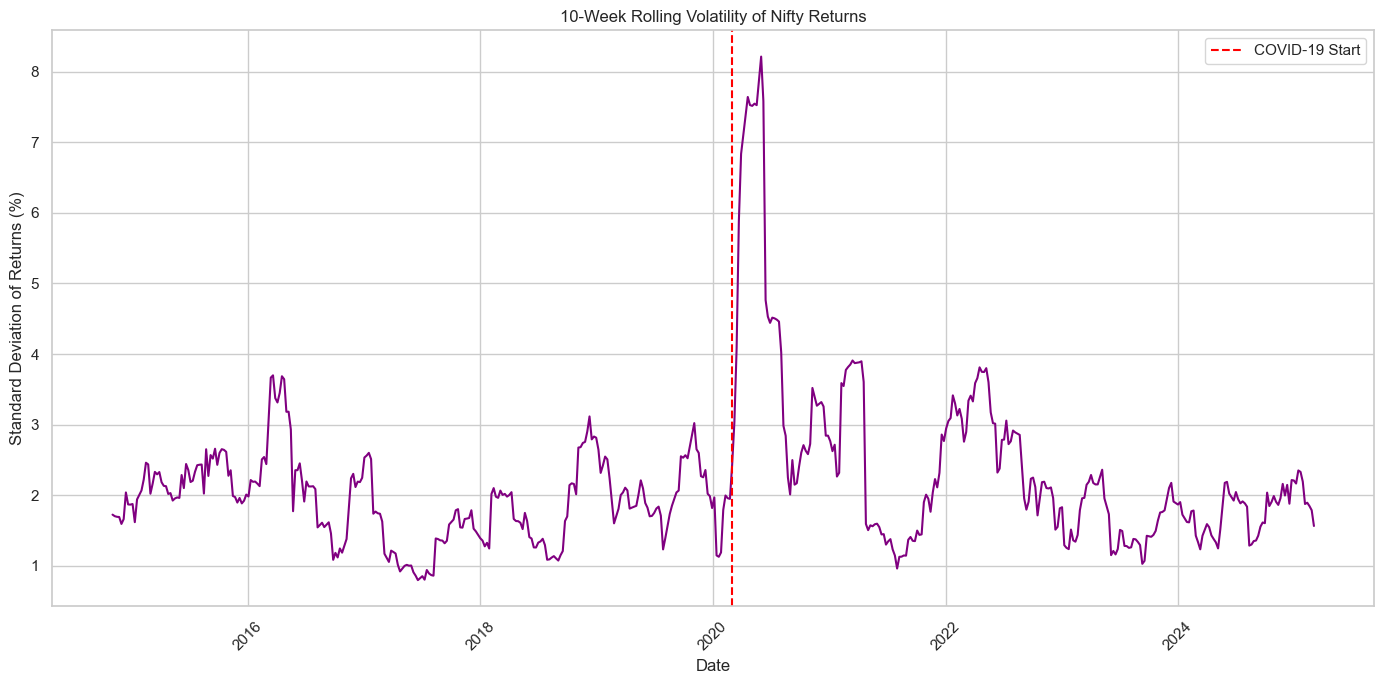

In [8]:


# --------------------------------------------------------------------------------
# Part 1: Overall Market Analysis
# --------------------------------------------------------------------------------

print("\n\nPart 1: Overall Market Analysis\n")

# Plot trend of Monday's closing price over time with COVID cutoff marker
plt.figure(figsize=(14, 7))
plt.plot(analysis_df['monday_date'], analysis_df['monday_close'], marker='o', linestyle='-', color='blue')
plt.axvline(x=covid_cutoff, color='red', linestyle='--', label='COVID-19 Start')
plt.title('Trend of Monday\'s First Hour Closing Price (2014-2025)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate weekly changes and plot
analysis_df['weekly_change'] = analysis_df['monday_close'].pct_change() * 100

# Handle missing values (NaNs) in 'weekly_change'
analysis_df = analysis_df.dropna(subset=['weekly_change'])

# Convert 'monday_date' to datetime objects (if it's not already)
analysis_df['monday_date'] = pd.to_datetime(analysis_df['monday_date'])

# Create a color list based on positive/negative changes
colors = ['green' if x > 0 else 'red' for x in analysis_df['weekly_change']]

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(analysis_df['monday_date'], analysis_df['weekly_change'], color=colors, width=5)  # Adjust width for better visualization
plt.axvline(x=pd.to_datetime(covid_cutoff), color='black', linestyle='--', label='COVID-19 Start')  # Ensure covid_cutoff is datetime
plt.title('Weekly Percentage Change in Monday\'s First Hour Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Volatility comparison using rolling standard deviation of returns
window_size = 10
analysis_df['rolling_volatility'] = analysis_df['weekly_change'].rolling(window=window_size).std()

plt.figure(figsize=(14, 7))
plt.plot(analysis_df['monday_date'], analysis_df['rolling_volatility'], color='purple')
plt.axvline(x=covid_cutoff, color='red', linestyle='--', label='COVID-19 Start')
plt.title(f'{window_size}-Week Rolling Volatility of Nifty Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation of Returns (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create interactive plot with Plotly comparing Monday Close and Range %
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=analysis_df['monday_date'], y=analysis_df['monday_close'],
               mode='lines+markers', name='Monday Close'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=analysis_df['monday_date'], y=analysis_df['range_pct'],
               mode='lines+markers', name='3-Week Range %'),
    secondary_y=True,
)

# Add a vertical line for COVID-19 start
fig.add_shape(
    type="line",
    x0=covid_cutoff,
    x1=covid_cutoff,
    y0=0,
    y1=1,
    yref="paper",
    line=dict(color="red", width=2, dash="dash"),
)

# Add annotation for COVID-19
fig.add_annotation(
    x=covid_cutoff,
    y=0.95,
    yref="paper",
    text="COVID-19 Start",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40
)

fig.update_layout(
    title_text="Monday's Close vs 3-Week Range Percentage (2014-2025)",
    xaxis_title="Date",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    height=600,
    width=1000
)

fig.update_yaxes(title_text="Monday Close Price", secondary_y=False)
fig.update_yaxes(title_text="3-Week Range %", secondary_y=True)

fig.show()



Part 2: Pre-COVID vs Post-COVID Comparison



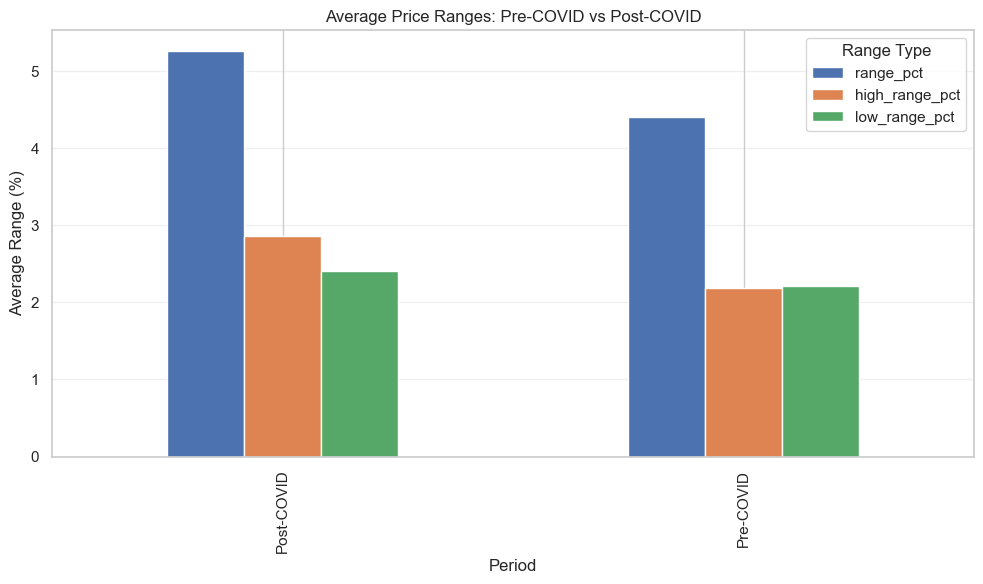

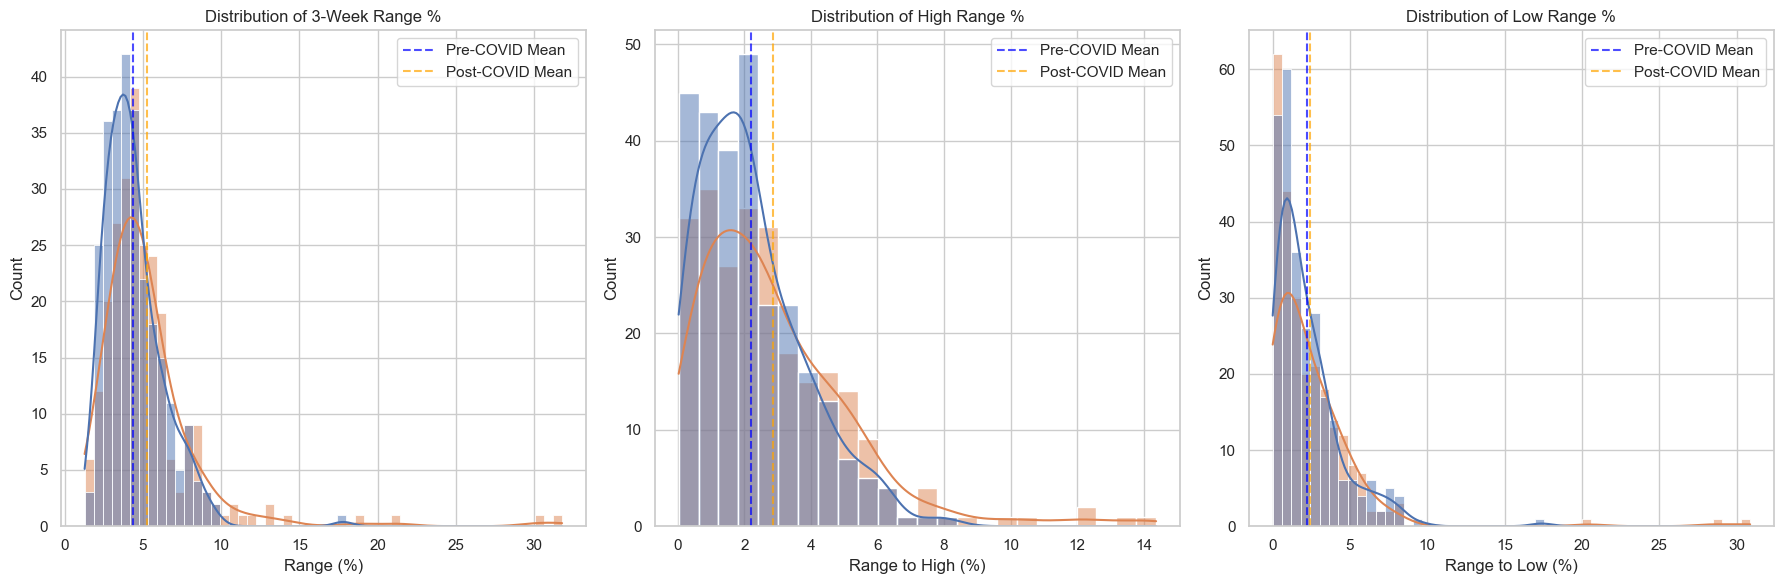

Pre-COVID Range Distribution Percentiles:
   Percentile  Total Range %  Upside Range %  Downside Range %
0          10       2.406906        0.355692          0.255043
1          25       3.054768        0.960666          0.733119
2          50       4.072025        1.914457          1.587497
3          75       5.293586        3.085153          2.984451
4          90       6.835511        4.398350          4.916528

Post-COVID Range Distribution Percentiles:
   Percentile  Total Range %  Upside Range %  Downside Range %
0          10       2.737932        0.547752          0.242769
1          25       3.534706        1.172856          0.623105
2          50       4.487805        2.336688          1.571400
3          75       5.963191        4.024128          3.325540
4          90       8.233187        5.525195          4.976279


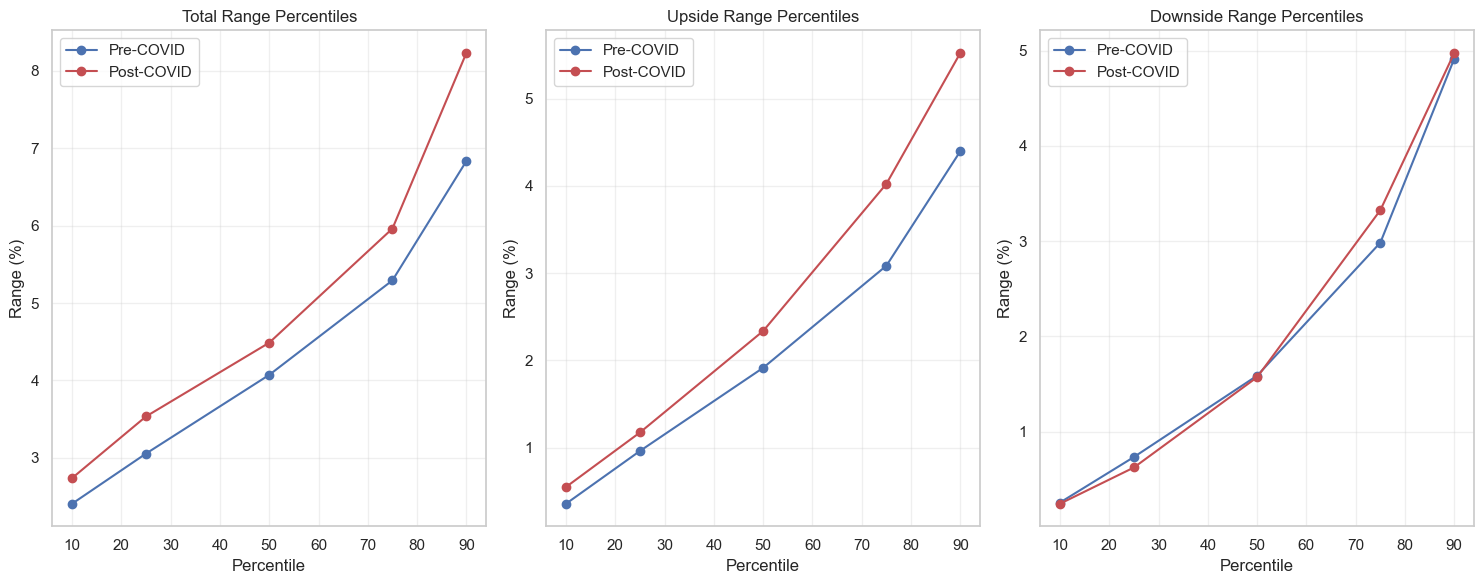

In [9]:


# --------------------------------------------------------------------------------
# Part 2: Pre-COVID vs Post-COVID Comparison
# --------------------------------------------------------------------------------

print("\n\nPart 2: Pre-COVID vs Post-COVID Comparison\n")

# Filter the dataframe for pre and post COVID eras
pre_covid_df = analysis_df[analysis_df['covid_era'] == 'Pre-COVID']
post_covid_df = analysis_df[analysis_df['covid_era'] == 'Post-COVID']

# Calculate average ranges for both periods
avg_ranges = analysis_df.groupby('covid_era')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()

# Create a bar plot comparing average ranges
plt.figure(figsize=(10, 6))
avg_ranges.plot(kind='bar', ax=plt.gca())
plt.title('Average Price Ranges: Pre-COVID vs Post-COVID')
plt.xlabel('Period')
plt.ylabel('Average Range (%)')
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Range Type')
plt.tight_layout()
plt.show()

# Distribution of range percentages for both periods
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Range
sns.histplot(data=analysis_df, x='range_pct', hue='covid_era', kde=True, ax=axes[0])
axes[0].axvline(x=pre_covid_df['range_pct'].mean(), color='blue', linestyle='--', alpha=0.7, label='Pre-COVID Mean')
axes[0].axvline(x=post_covid_df['range_pct'].mean(), color='orange', linestyle='--', alpha=0.7, label='Post-COVID Mean')
axes[0].set_title('Distribution of 3-Week Range %')
axes[0].set_xlabel('Range (%)')
axes[0].legend()

# High Range
sns.histplot(data=analysis_df, x='high_range_pct', hue='covid_era', kde=True, ax=axes[1])
axes[1].axvline(x=pre_covid_df['high_range_pct'].mean(), color='blue', linestyle='--', alpha=0.7, label='Pre-COVID Mean')
axes[1].axvline(x=post_covid_df['high_range_pct'].mean(), color='orange', linestyle='--', alpha=0.7, label='Post-COVID Mean')
axes[1].set_title('Distribution of High Range %')
axes[1].set_xlabel('Range to High (%)')
axes[1].legend()

# Low Range
sns.histplot(data=analysis_df, x='low_range_pct', hue='covid_era', kde=True, ax=axes[2])
axes[2].axvline(x=pre_covid_df['low_range_pct'].mean(), color='blue', linestyle='--', alpha=0.7, label='Pre-COVID Mean')
axes[2].axvline(x=post_covid_df['low_range_pct'].mean(), color='orange', linestyle='--', alpha=0.7, label='Post-COVID Mean')
axes[2].set_title('Distribution of Low Range %')
axes[2].set_xlabel('Range to Low (%)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Calculate percentiles for range distribution by COVID era
percentiles = [10, 25, 50, 75, 90]

# Create DataFrames for each period
pre_covid_percentiles = pd.DataFrame({
    'Percentile': percentiles,
    'Total Range %': pre_covid_df['range_pct'].quantile(q=[p/100 for p in percentiles]).values,
    'Upside Range %': pre_covid_df['high_range_pct'].quantile(q=[p/100 for p in percentiles]).values,
    'Downside Range %': pre_covid_df['low_range_pct'].quantile(q=[p/100 for p in percentiles]).values
})

post_covid_percentiles = pd.DataFrame({
    'Percentile': percentiles,
    'Total Range %': post_covid_df['range_pct'].quantile(q=[p/100 for p in percentiles]).values,
    'Upside Range %': post_covid_df['high_range_pct'].quantile(q=[p/100 for p in percentiles]).values,
    'Downside Range %': post_covid_df['low_range_pct'].quantile(q=[p/100 for p in percentiles]).values
})

# Display percentiles
print("Pre-COVID Range Distribution Percentiles:")
print(pre_covid_percentiles)

print("\nPost-COVID Range Distribution Percentiles:")
print(post_covid_percentiles)

# Visualize percentiles comparison
plt.figure(figsize=(15, 6))

# Total Range
plt.subplot(1, 3, 1)
plt.plot(pre_covid_percentiles['Percentile'], pre_covid_percentiles['Total Range %'], 'bo-', label='Pre-COVID')
plt.plot(post_covid_percentiles['Percentile'], post_covid_percentiles['Total Range %'], 'ro-', label='Post-COVID')
plt.title('Total Range Percentiles')
plt.xlabel('Percentile')
plt.ylabel('Range (%)')
plt.grid(True, alpha=0.3)
plt.legend()

# Upside Range
plt.subplot(1, 3, 2)
plt.plot(pre_covid_percentiles['Percentile'], pre_covid_percentiles['Upside Range %'], 'bo-', label='Pre-COVID')
plt.plot(post_covid_percentiles['Percentile'], post_covid_percentiles['Upside Range %'], 'ro-', label='Post-COVID')
plt.title('Upside Range Percentiles')
plt.xlabel('Percentile')
plt.ylabel('Range (%)')
plt.grid(True, alpha=0.3)
plt.legend()

# Downside Range
plt.subplot(1, 3, 3)
plt.plot(pre_covid_percentiles['Percentile'], pre_covid_percentiles['Downside Range %'], 'bo-', label='Pre-COVID')
plt.plot(post_covid_percentiles['Percentile'], post_covid_percentiles['Downside Range %'], 'ro-', label='Post-COVID')
plt.title('Downside Range Percentiles')
plt.xlabel('Percentile')
plt.ylabel('Range (%)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()



Part 3: Seasonal Analysis Pre vs Post COVID



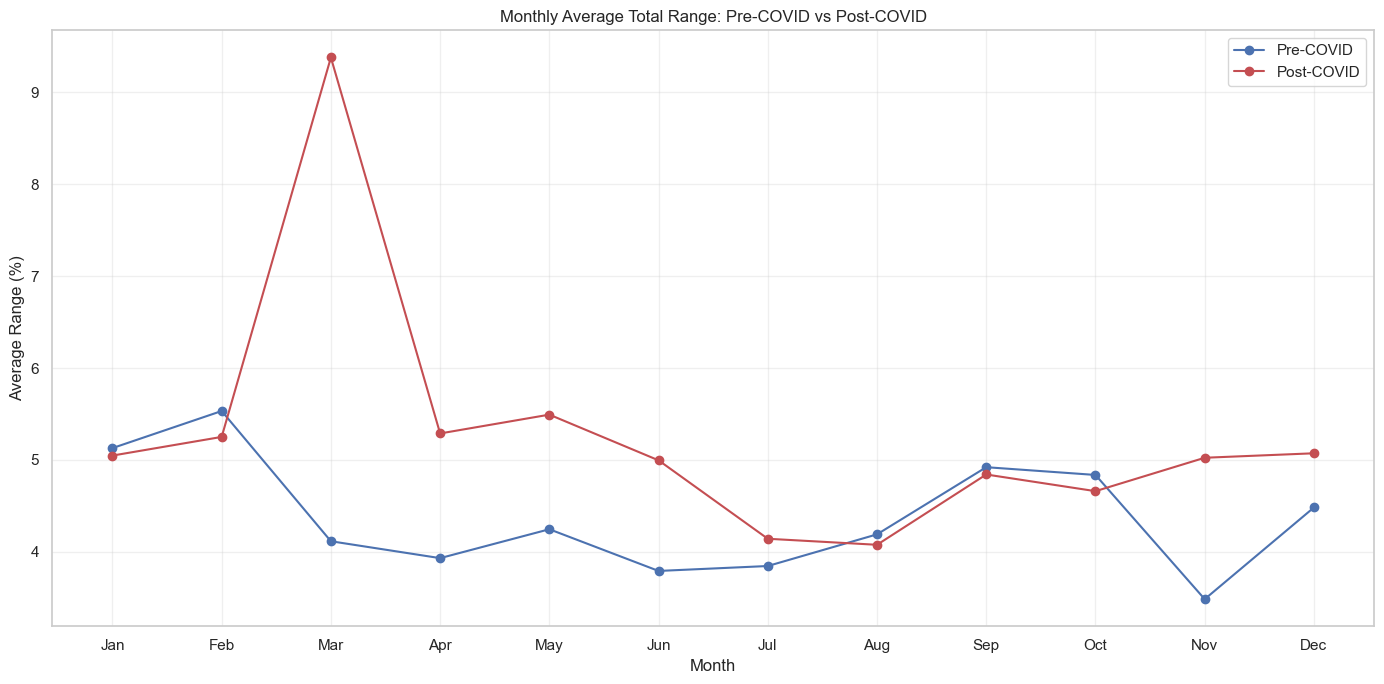

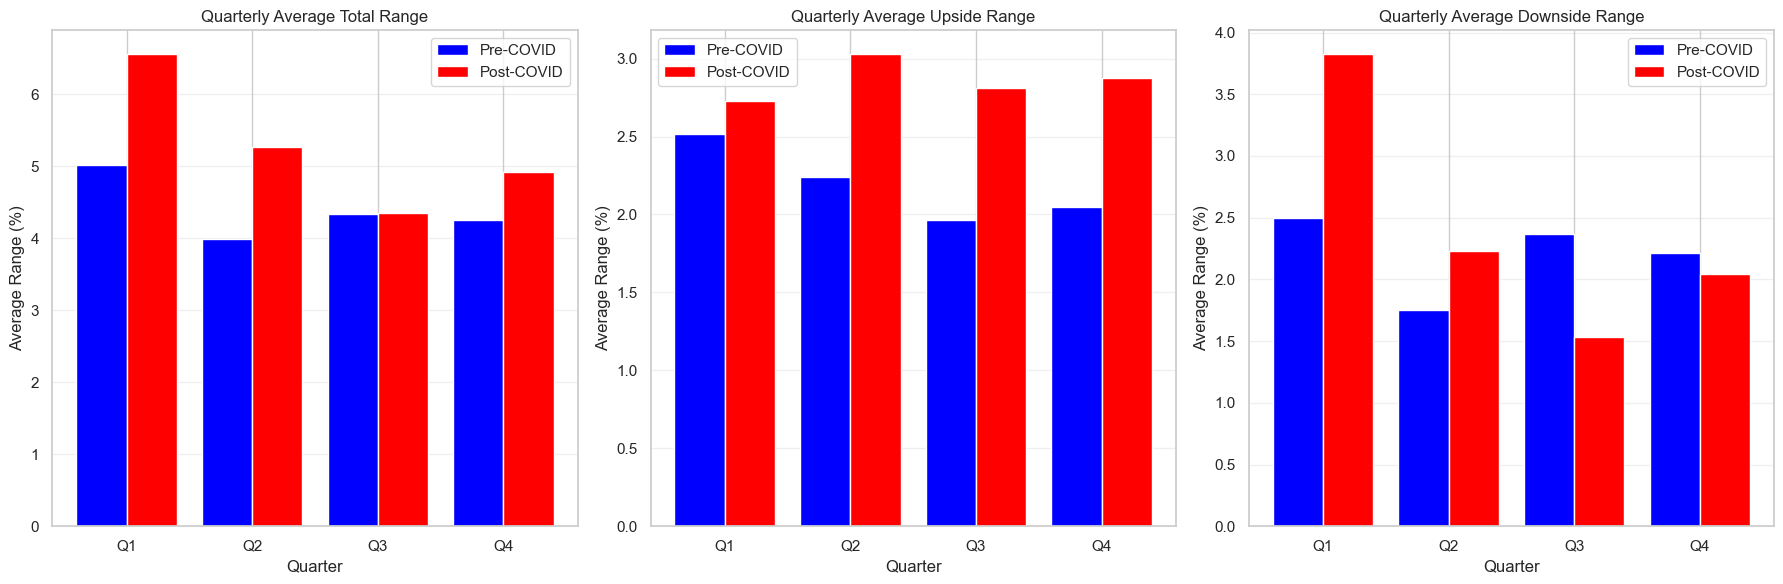

In [10]:


# --------------------------------------------------------------------------------
# Part 3: Seasonal Analysis Pre vs Post COVID
# --------------------------------------------------------------------------------

print("\n\nPart 3: Seasonal Analysis Pre vs Post COVID\n")

# Monthly analysis of ranges by COVID era
monthly_ranges_pre = pre_covid_df.groupby('month')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()
monthly_ranges_post = post_covid_df.groupby('month')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()

# Total Range by Month
plt.figure(figsize=(14, 7))
plt.plot(range(1, 13), monthly_ranges_pre['range_pct'], 'bo-', label='Pre-COVID')
plt.plot(range(1, 13), monthly_ranges_post['range_pct'], 'ro-', label='Post-COVID')
plt.title('Monthly Average Total Range: Pre-COVID vs Post-COVID')
plt.xlabel('Month')
plt.ylabel('Average Range (%)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Quarterly analysis of ranges by COVID era
quarterly_ranges_pre = pre_covid_df.groupby('quarter')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()
quarterly_ranges_post = post_covid_df.groupby('quarter')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()

# Plot quarterly ranges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Range by Quarter
axes[0].bar(np.arange(4) - 0.2, quarterly_ranges_pre['range_pct'], width=0.4, label='Pre-COVID', color='blue')
axes[0].bar(np.arange(4) + 0.2, quarterly_ranges_post['range_pct'], width=0.4, label='Post-COVID', color='red')
axes[0].set_title('Quarterly Average Total Range')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Average Range (%)')
axes[0].set_xticks(range(4))
axes[0].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
axes[0].grid(True, axis='y', alpha=0.3)
axes[0].legend()

# Upside Range by Quarter
axes[1].bar(np.arange(4) - 0.2, quarterly_ranges_pre['high_range_pct'], width=0.4, label='Pre-COVID', color='blue')
axes[1].bar(np.arange(4) + 0.2, quarterly_ranges_post['high_range_pct'], width=0.4, label='Post-COVID', color='red')
axes[1].set_title('Quarterly Average Upside Range')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Average Range (%)')
axes[1].set_xticks(range(4))
axes[1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
axes[1].grid(True, axis='y', alpha=0.3)
axes[1].legend()

# Downside Range by Quarter
axes[2].bar(np.arange(4) - 0.2, quarterly_ranges_pre['low_range_pct'], width=0.4, label='Pre-COVID', color='blue')
axes[2].bar(np.arange(4) + 0.2, quarterly_ranges_post['low_range_pct'], width=0.4, label='Post-COVID', color='red')
axes[2].set_title('Quarterly Average Downside Range')
axes[2].set_xlabel('Quarter')
axes[2].set_ylabel('Average Range (%)')
axes[2].set_xticks(range(4))
axes[2].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
axes[2].grid(True, axis='y', alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

In [11]:
print("Shape of vix_df immediately before filtering for Mondays:", vix_df.shape)
print("Columns of vix_df immediately before filtering for Mondays:", vix_df.columns)
print("Data type of vix_df['datetime'] immediately before filtering for Mondays:", vix_df['datetime'].dtype if 'datetime' in vix_df else "datetime column not found")
monday_vix = vix_df[vix_df['datetime'].dt.dayofweek == 0].copy()  # Error Line

Shape of vix_df immediately before filtering for Mondays: (18155, 8)
Columns of vix_df immediately before filtering for Mondays: Index(['datetime', 'open', 'high', 'low', 'close', 'Volume', 'Volume MA', 'date'], dtype='object')
Data type of vix_df['datetime'] immediately before filtering for Mondays: datetime64[ns, UTC+05:30]




Part 4: VIX Analysis Pre vs Post COVID

Shape of analysis_df before merge: (517, 37)
Shape of monday_vix before merge: (516, 8)
analysis_df head before merge:
   monday_date monday_day  monday_open  monday_low  monday_high  monday_close  monday_volume expiry_date expiry_day  expiry_open  expiry_low  expiry_high  expiry_close  expiry_volume  3_week_high  3_week_low  monday_close_minus_expiry_close  3_week_high_minus_monday_close  3_week_low_minus_monday_close  3_week_high_minus_thursday_close  3_week_low_minus_thursday_close  range_3week  monday_to_high_range  monday_to_low_range  is_high_reached  is_low_reached  range_pct  high_range_pct  low_range_pct  week_of_year  month  year  quarter  covid_era  weekly_change  rolling_volatility monday_date_only
1  2014-08-25     Monday      7934.60     7927.75       7957.7       7940.55              0  2014-09-11   Thursday      8118.65     8096.25      8127.95       8114.75              0      8174.55     7871.65                          -174.2

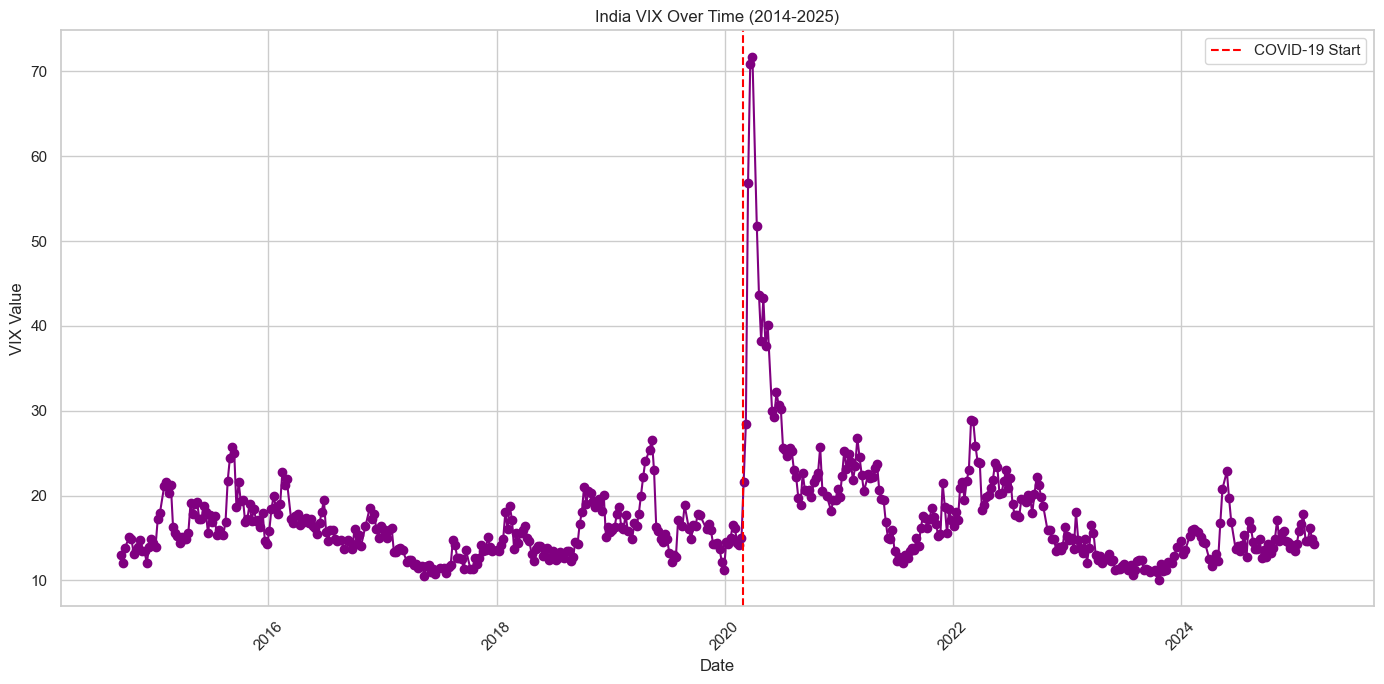

covid_era
Pre-COVID     266
Post-COVID    247
Name: count, dtype: int64


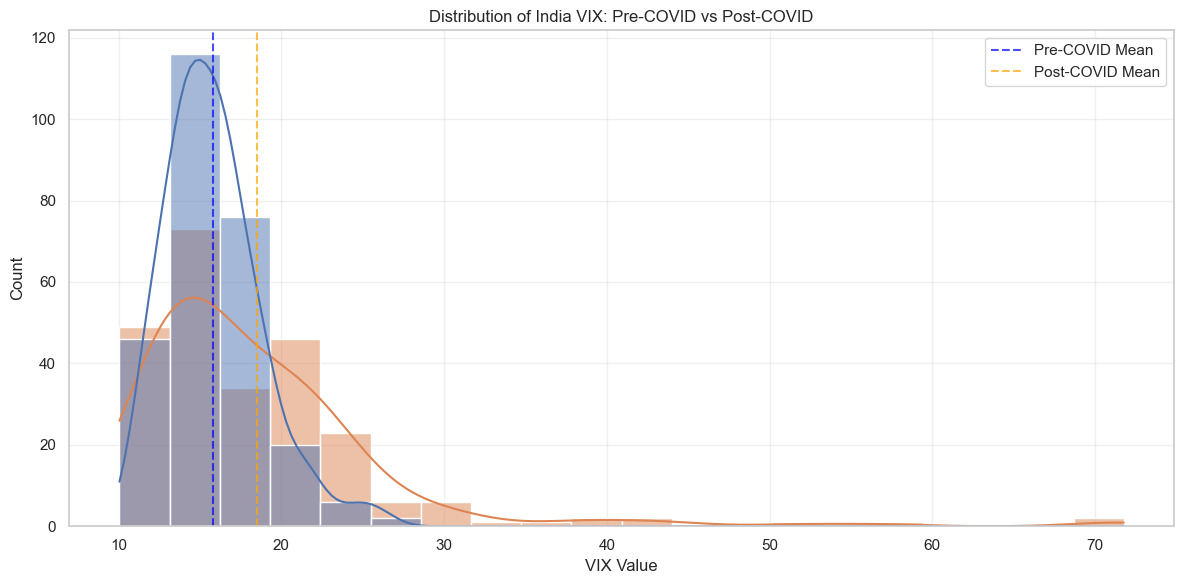

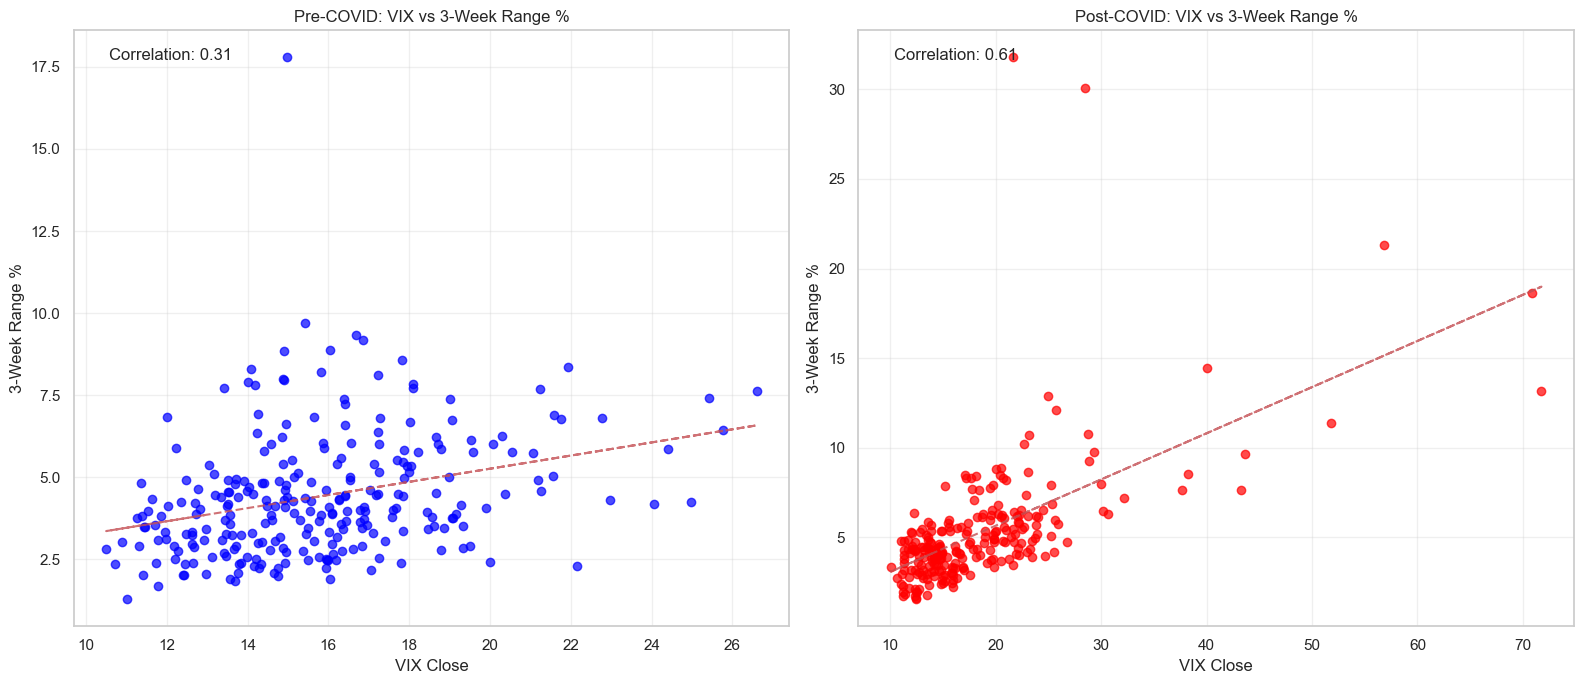


Correlation Matrix - Pre-COVID:
                vix_close  range_pct  high_range_pct  low_range_pct
vix_close        1.000000   0.310558        0.279617       0.066035
range_pct        0.310558   1.000000        0.237962       0.699807
high_range_pct   0.279617   0.237962        1.000000      -0.527285
low_range_pct    0.066035   0.699807       -0.527285       1.000000

Correlation Matrix - Post-COVID:
                vix_close  range_pct  high_range_pct  low_range_pct
vix_close        1.000000   0.607587        0.516037       0.264539
range_pct        0.607587   1.000000        0.395582       0.757766
high_range_pct   0.516037   0.395582        1.000000      -0.299542
low_range_pct    0.264539   0.757766       -0.299542       1.000000


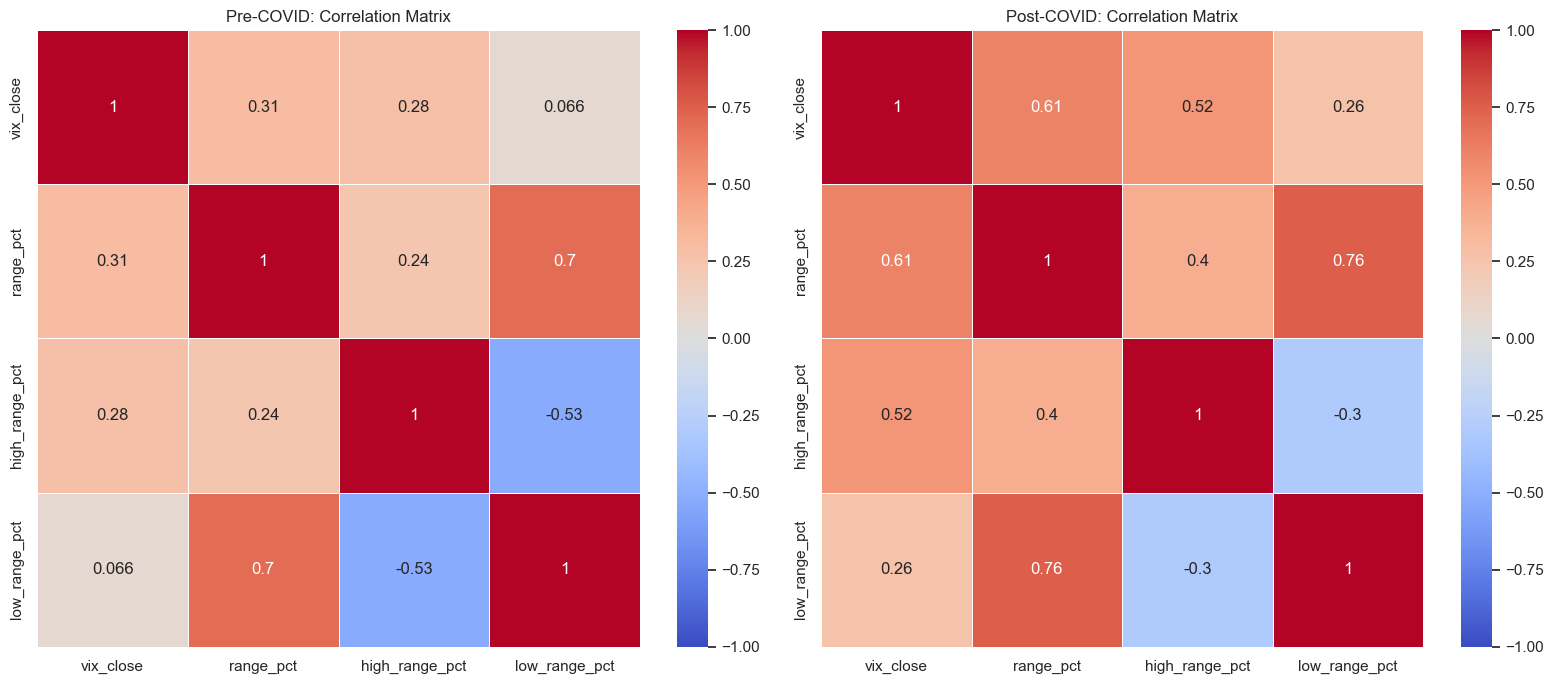

In [12]:
# --------------------------------------------------------------------------------
# Part 4: VIX Analysis Pre vs Post COVID
# --------------------------------------------------------------------------------

print("\n\nPart 4: VIX Analysis Pre vs Post COVID\n")

# Prepare VIX data
# Filter for Mondays
monday_vix = vix_df[vix_df['datetime'].dt.dayofweek == 0].copy()

# Find the first hourly close for each Monday
monday_vix['date'] = monday_vix['datetime'].dt.date  # Extract the date part
monday_vix = monday_vix.loc[monday_vix.groupby('date')['datetime'].idxmin()]  # Get the index of minimum datetime
monday_vix['date'] = pd.to_datetime(monday_vix['date'])  # Convert back to datetime

# Convert monday_date to date for merging
analysis_df['monday_date_only'] = analysis_df['monday_date'].dt.date
analysis_df['monday_date_only'] = pd.to_datetime(analysis_df['monday_date_only'])

# Debugging: Print shapes and head before merge
print("Shape of analysis_df before merge:", analysis_df.shape)
print("Shape of monday_vix before merge:", monday_vix.shape)
print("analysis_df head before merge:\n", analysis_df.head())
print("monday_vix head before merge:\n", monday_vix.head())

# Merge analysis_df with VIX data on Monday's date
merged_df = pd.merge(analysis_df, monday_vix, left_on='monday_date_only', right_on='date', how='inner')

# Rename 'close' to 'vix_close' for clarity
merged_df = merged_df.rename(columns={'close': 'vix_close'})

# Debugging: Print shape and head after merge
print("Shape of merged_df after merge:", merged_df.shape)
print("merged_df head after merge:\n", merged_df.head())

# Calculate VIX statistics by COVID era
vix_stats = merged_df.groupby('covid_era')['vix_close'].describe()
print("VIX Statistics by COVID Era:")
print(vix_stats)

# Plot VIX over time with COVID marker
plt.figure(figsize=(14, 7))
plt.plot(merged_df['monday_date'], merged_df['vix_close'], marker='o', linestyle='-', color='purple')
plt.axvline(x=covid_cutoff, color='red', linestyle='--', label='COVID-19 Start')
plt.title('India VIX Over Time (2014-2025)')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Debugging: Print value counts of covid_era
print(merged_df['covid_era'].value_counts())

# Distribution of VIX by COVID era
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='vix_close', hue='covid_era', kde=True, bins=20)
plt.axvline(x=merged_df[merged_df['covid_era'] == 'Pre-COVID']['vix_close'].mean(),
            color='blue', linestyle='--', alpha=0.7, label='Pre-COVID Mean')
plt.axvline(x=merged_df[merged_df['covid_era'] == 'Post-COVID']['vix_close'].mean(),
            color='orange', linestyle='--', alpha=0.7, label='Post-COVID Mean')
plt.title('Distribution of India VIX: Pre-COVID vs Post-COVID')
plt.xlabel('VIX Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create VIX categories for analysis
merged_df['vix_category'] = pd.qcut(merged_df['vix_close'], 4, labels=['Very Low', 'Low', 'High', 'Very High'])

# Analyze the relationship between VIX and range percentages by COVID era
# Pre-COVID
pre_covid_merged = merged_df[merged_df['covid_era'] == 'Pre-COVID']
post_covid_merged = merged_df[merged_df['covid_era'] == 'Post-COVID']

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Pre-COVID scatter
axes[0].scatter(pre_covid_merged['vix_close'], pre_covid_merged['range_pct'], alpha=0.7, color='blue')
axes[0].set_title('Pre-COVID: VIX vs 3-Week Range %')
axes[0].set_xlabel('VIX Close')
axes[0].set_ylabel('3-Week Range %')
axes[0].grid(True, alpha=0.3)

# Add regression line - Pre-COVID
z_pre = np.polyfit(pre_covid_merged['vix_close'], pre_covid_merged['range_pct'], 1)
p_pre = np.poly1d(z_pre)
axes[0].plot(pre_covid_merged['vix_close'], p_pre(pre_covid_merged['vix_close']), "r--", alpha=0.8)

# Add correlation coefficient - Pre-COVID
corr_pre = pre_covid_merged['vix_close'].corr(pre_covid_merged['range_pct'])
axes[0].annotate(f'Correlation: {corr_pre:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

# Post-COVID scatter
axes[1].scatter(post_covid_merged['vix_close'], post_covid_merged['range_pct'], alpha=0.7, color='red')
axes[1].set_title('Post-COVID: VIX vs 3-Week Range %')
axes[1].set_xlabel('VIX Close')
axes[1].set_ylabel('3-Week Range %')
axes[1].grid(True, alpha=0.3)

# Add regression line - Post-COVID
z_post = np.polyfit(post_covid_merged['vix_close'], post_covid_merged['range_pct'], 1)
p_post = np.poly1d(z_post)
axes[1].plot(post_covid_merged['vix_close'], p_post(post_covid_merged['vix_close']), "r--", alpha=0.8)

# Add correlation coefficient - Post-COVID
corr_post = post_covid_merged['vix_close'].corr(post_covid_merged['range_pct'])
axes[1].annotate(f'Correlation: {corr_post:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.show()

# Correlation matrix by COVID era
print("\nCorrelation Matrix - Pre-COVID:")
corr_pre_covid = pre_covid_merged[['vix_close', 'range_pct', 'high_range_pct', 'low_range_pct']].corr()
print(corr_pre_covid)

print("\nCorrelation Matrix - Post-COVID:")
corr_post_covid = post_covid_merged[['vix_close', 'range_pct', 'high_range_pct', 'low_range_pct']].corr()
print(corr_post_covid)

# Visualize correlation matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Pre-COVID correlation heatmap
sns.heatmap(corr_pre_covid, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5, ax=axes[0])
axes[0].set_title('Pre-COVID: Correlation Matrix')

# Post-COVID correlation heatmap
sns.heatmap(corr_post_covid, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5, ax=axes[1])
axes[1].set_title('Post-COVID: Correlation Matrix')

plt.tight_layout()
plt.show()

In [13]:
print("Shape of analysis_df before merge:", analysis_df.shape)

print("Shape of monday_vix before merge:", monday_vix.shape)

print("analysis_df head before merge:\n", analysis_df.head())

print("monday_vix head before merge:\n", monday_vix.head())

print("Shape of merged_df after merge:", merged_df.shape)

print("merged_df head after merge:\n", merged_df.head())

print(merged_df['covid_era'].value_counts())

Shape of analysis_df before merge: (517, 37)
Shape of monday_vix before merge: (516, 8)
analysis_df head before merge:
   monday_date monday_day  monday_open  monday_low  monday_high  monday_close  monday_volume expiry_date expiry_day  expiry_open  expiry_low  expiry_high  expiry_close  expiry_volume  3_week_high  3_week_low  monday_close_minus_expiry_close  3_week_high_minus_monday_close  3_week_low_minus_monday_close  3_week_high_minus_thursday_close  3_week_low_minus_thursday_close  range_3week  monday_to_high_range  monday_to_low_range  is_high_reached  is_low_reached  range_pct  high_range_pct  low_range_pct  week_of_year  month  year  quarter  covid_era  weekly_change  rolling_volatility monday_date_only
1  2014-08-25     Monday      7934.60     7927.75       7957.7       7940.55              0  2014-09-11   Thursday      8118.65     8096.25      8127.95       8114.75              0      8174.55     7871.65                          -174.20                          234.00         



Part 5: Trading Scenarios Analysis Pre vs Post COVID


Value counts of monday_volume before qcut:
monday_volume
0            335
106075459      1
45070873       1
36068551       1
40523109       1
            ... 
80479030       1
66691973       1
57332412       1
60718343       1
72223165       1
Name: count, Length: 179, dtype: int64

ValueError during qcut: Bin labels must be one fewer than the number of bin edges. Attempting equal-width binning with pd.cut.

Value counts of volume_category after processing:
volume_category
Low            368
Medium-Low     125
Medium-High     17
High             3
Name: count, dtype: int64
0

Data type of merged_df['vix_category']: category
Pre-COVID Trading Scenarios:
                      range_pct       high_range_pct       low_range_pct      
                           mean count           mean count          mean count
scenario                                                                      
High VIX & Low Volume  4.820095   122       2

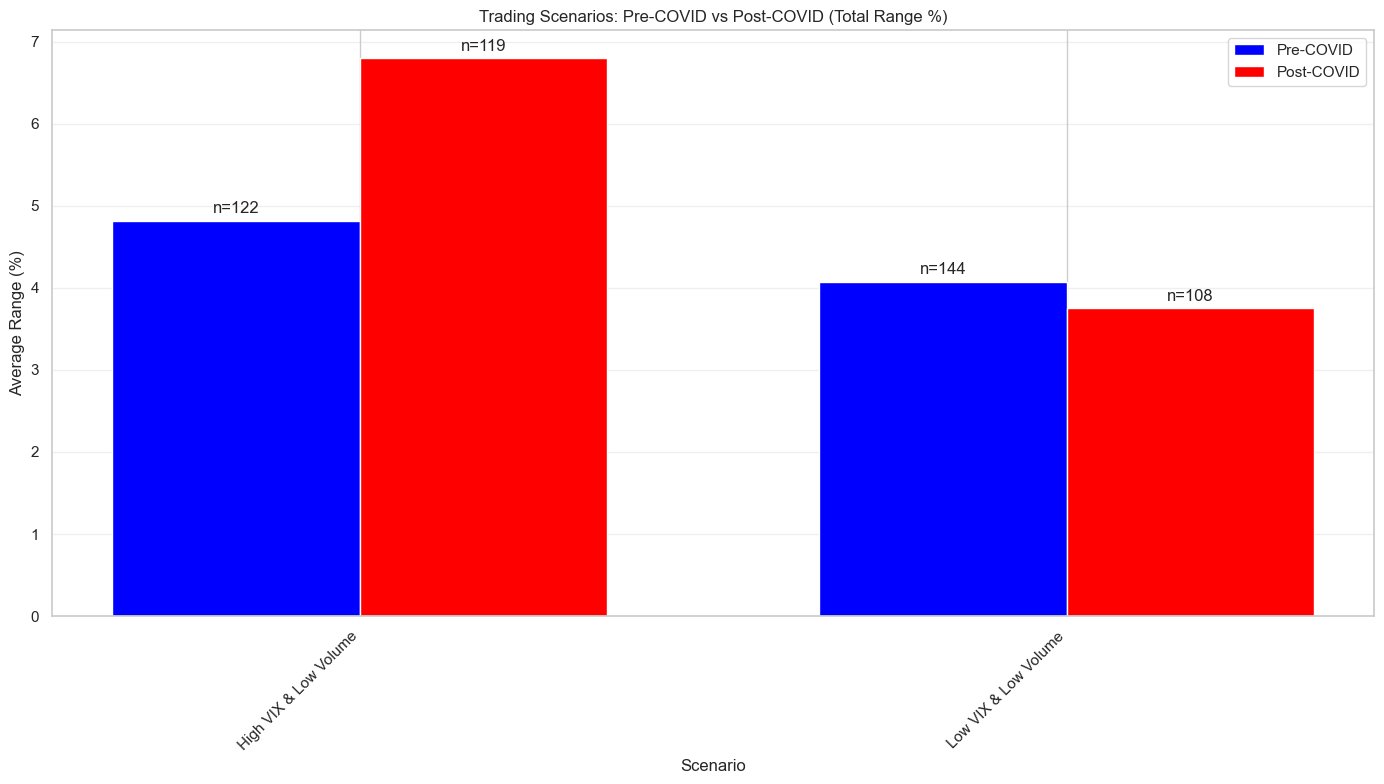

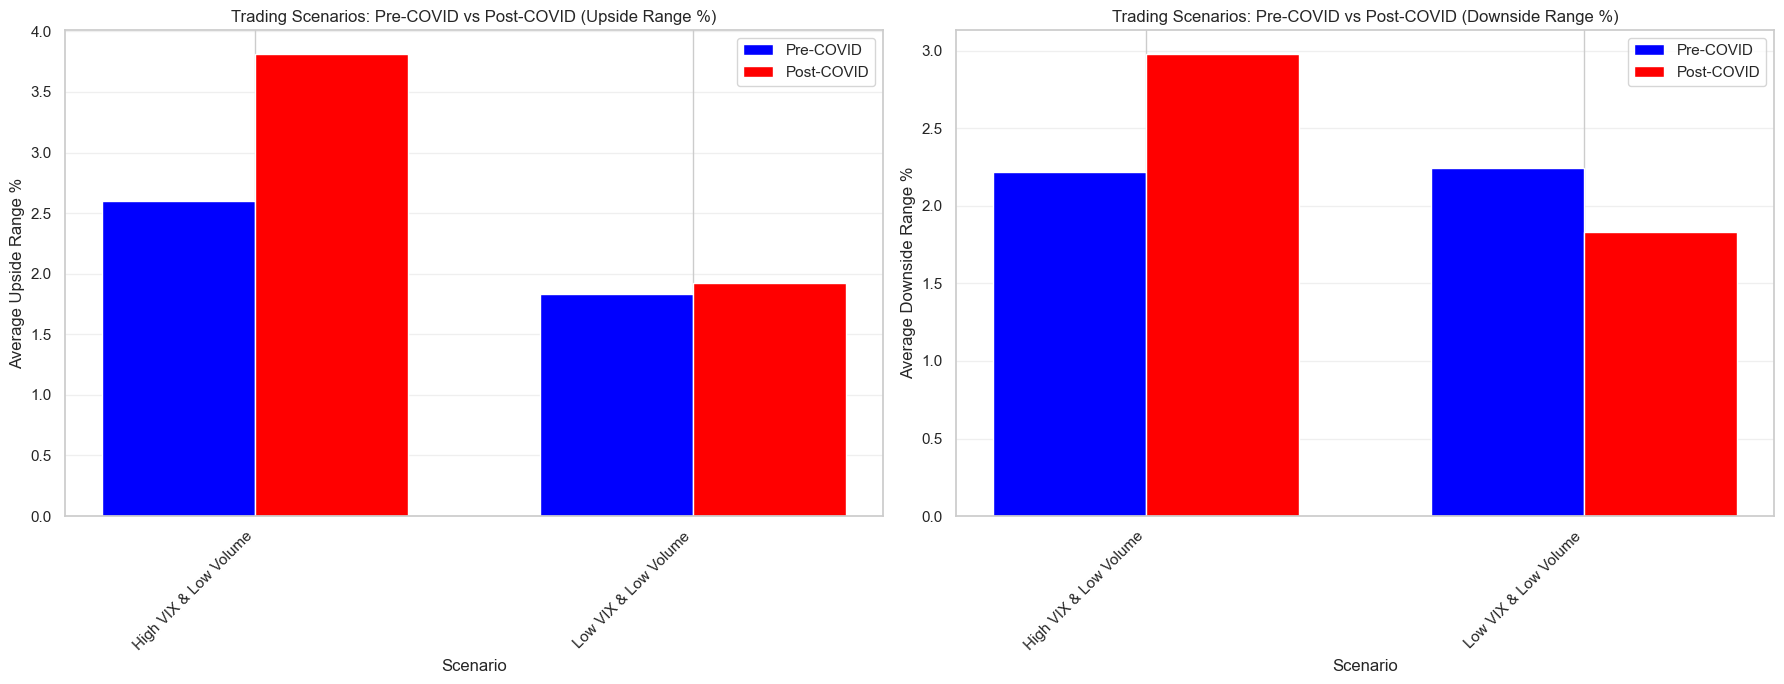

In [14]:


# --------------------------------------------------------------------------------
# Part 5: Trading Scenarios Analysis Pre vs Post COVID
# --------------------------------------------------------------------------------

print("\n\nPart 5: Trading Scenarios Analysis Pre vs Post COVID\n")

# Check the distribution of 'monday_volume' before applying qcut
print("\nValue counts of monday_volume before qcut:")
print(merged_df['monday_volume'].value_counts())

# Define labels outside the try-except block
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

try:
    # Attempt quantile-based binning with duplicates dropped
    merged_df['volume_category'] = pd.qcut(merged_df['monday_volume'], q=4, labels=labels, duplicates='drop')

    # Check if the number of unique categories is less than the number of labels
    if merged_df['volume_category'].nunique() < len(labels):
        print("\nFewer than the requested number of unique volume categories after dropping duplicates. Switching to equal-width binning.")
        raise ValueError("qcut failed to produce enough bins")  # Force the except block

except ValueError as e:
    print(f"\nValueError during qcut: {e}. Attempting equal-width binning with pd.cut.")
    # Determine the number of bins based on unique values in monday_volume
    n_unique = merged_df['monday_volume'].nunique()

    if n_unique < 2:  # If there is only one unique value
        print("\nOnly one unique volume value. Assigning a single 'Low' category to all rows.")
        merged_df['volume_category'] = 'Low'  # Assign a single category

    elif n_unique < len(labels): # use n_unique categories
        print(f"\nUsing {n_unique} volume categories as there aren't enough unique values for four.")
        labels_adjusted = labels[:n_unique] #Take only number of unique labels to match the number of unique values
        merged_df['volume_category'] = pd.cut(merged_df['monday_volume'], bins=n_unique, labels=labels_adjusted, include_lowest=True)
    else: # n_unique >=len(labels) , so can bin with the given labels
        merged_df['volume_category'] = pd.cut(merged_df['monday_volume'], bins=4, labels=labels, include_lowest=True) # Use 4 equal-width categories

# Check the result of volume category assignment
print("\nValue counts of volume_category after processing:")
print(merged_df['volume_category'].value_counts(dropna=False)) # Show NaN counts too
print(merged_df['volume_category'].isna().sum()) # Print Number of NA

# Check the types of vix_category
print("\nData type of merged_df['vix_category']:", merged_df['vix_category'].dtype)

# Define trading scenarios
conditions = [
    (merged_df['vix_category'].isin(['High', 'Very High']) & merged_df['volume_category'].isin(['High', 'Medium-High'])),
    (merged_df['vix_category'].isin(['High', 'Very High']) & merged_df['volume_category'].isin(['Low', 'Medium-Low'])),
    (merged_df['vix_category'].isin(['Very Low', 'Low']) & merged_df['volume_category'].isin(['High', 'Medium-High'])),
    (merged_df['vix_category'].isin(['Very Low', 'Low']) & merged_df['volume_category'].isin(['Low', 'Medium-Low']))
]

scenario_names = [
    'High VIX & High Volume',
    'High VIX & Low Volume',
    'Low VIX & High Volume',
    'Low VIX & Low Volume'
]

merged_df['scenario'] = np.select(conditions, scenario_names, default='Other')

# Analyze scenarios by COVID era
pre_covid_scenarios = merged_df[merged_df['covid_era'] == 'Pre-COVID'].groupby('scenario')[['range_pct', 'high_range_pct', 'low_range_pct']].agg(['mean', 'count'])
post_covid_scenarios = merged_df[merged_df['covid_era'] == 'Post-COVID'].groupby('scenario')[['range_pct', 'high_range_pct', 'low_range_pct']].agg(['mean', 'count'])

print("Pre-COVID Trading Scenarios:")
print(pre_covid_scenarios)

print("\nPost-COVID Trading Scenarios:")
print(post_covid_scenarios)

# Visualize trading scenarios comparison
scenarios_to_plot = [s for s in scenario_names if s in pre_covid_scenarios.index and s in post_covid_scenarios.index]

# Set up plot for total range
plt.figure(figsize=(14, 8))

# Positions for bars
x = np.arange(len(scenarios_to_plot))
width = 0.35

# Ensure the scenarios exist in pre_covid_scenarios and post_covid_scenarios
# Ensure the scenarios exist in pre_covid_scenarios and post_covid_scenarios
x_positions = []
labels_to_plot = []

for i, s in enumerate(scenarios_to_plot):
    if s not in pre_covid_scenarios.index:
        print(f"Warning: Scenario '{s}' not found in pre_covid_scenarios. Skipping.")
        continue

    if s not in post_covid_scenarios.index:
        print(f"Warning: Scenario '{s}' not found in post_covid_scenarios. Skipping.")
        continue

    # Append position and label
    x_positions.append(i)
    labels_to_plot.append(s)

# Plot pre-COVID and post-COVID bars for total range
plt.bar(np.array(x_positions) - width / 2,
        [pre_covid_scenarios.loc[s, ('range_pct', 'mean')] for s in labels_to_plot],
        width, label='Pre-COVID', color='blue')
plt.bar(np.array(x_positions) + width / 2,
        [post_covid_scenarios.loc[s, ('range_pct', 'mean')] for s in labels_to_plot],
        width, label='Post-COVID', color='red')

# Add count annotations
for i, s in enumerate(labels_to_plot):
    pre_count = pre_covid_scenarios.loc[s, ('range_pct', 'count')]
    post_count = post_covid_scenarios.loc[s, ('range_pct', 'count')]
    plt.annotate(f'n={int(pre_count)}', xy=(x_positions[i] - width / 2, pre_covid_scenarios.loc[s, ('range_pct', 'mean')]),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    plt.annotate(f'n={int(post_count)}', xy=(x_positions[i] + width / 2, post_covid_scenarios.loc[s, ('range_pct', 'mean')]),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Trading Scenarios: Pre-COVID vs Post-COVID (Total Range %)')
plt.xlabel('Scenario')
plt.ylabel('Average Range (%)')
plt.xticks(x_positions, labels_to_plot, rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Visualize upside and downside range by scenario
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Ensure the scenarios exist in pre_covid_scenarios and post_covid_scenarios for subplot 1
x_positions = []
labels_to_plot = []

for i, s in enumerate(scenarios_to_plot):
    if s not in pre_covid_scenarios.index:
        print(f"Warning: Scenario '{s}' not found in pre_covid_scenarios. Skipping.")
        continue

    if s not in post_covid_scenarios.index:
        print(f"Warning: Scenario '{s}' not found in post_covid_scenarios. Skipping.")
        continue

    # Append position and label
    x_positions.append(i)
    labels_to_plot.append(s)

# Plot upside range
axes[0].bar(np.array(x_positions) - width / 2,
            [pre_covid_scenarios.loc[s, ('high_range_pct', 'mean')] for s in labels_to_plot],
            width, label='Pre-COVID', color='blue')
axes[0].bar(np.array(x_positions) + width / 2,
            [post_covid_scenarios.loc[s, ('high_range_pct', 'mean')] for s in labels_to_plot],
            width, label='Post-COVID', color='red')
axes[0].set_title('Trading Scenarios: Pre-COVID vs Post-COVID (Upside Range %)')
axes[0].set_xlabel('Scenario')
axes[0].set_ylabel('Average Upside Range %')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels_to_plot, rotation=45, ha='right')
axes[0].grid(True, axis='y', alpha=0.3)
axes[0].legend()

# Clear existing x_positions and labels_to_plot
x_positions = []
labels_to_plot = []

for i, s in enumerate(scenarios_to_plot):
    if s not in pre_covid_scenarios.index:
        print(f"Warning: Scenario '{s}' not found in pre_covid_scenarios. Skipping.")
        continue

    if s not in post_covid_scenarios.index:
        print(f"Warning: Scenario '{s}' not found in post_covid_scenarios. Skipping.")
        continue

    # Append position and label
    x_positions.append(i)
    labels_to_plot.append(s)

# Plot downside range
axes[1].bar(np.array(x_positions) - width / 2,
            [pre_covid_scenarios.loc[s, ('low_range_pct', 'mean')] for s in labels_to_plot],
            width, label='Pre-COVID', color='blue')
axes[1].bar(np.array(x_positions) + width / 2,
            [post_covid_scenarios.loc[s, ('low_range_pct', 'mean')] for s in labels_to_plot],
            width, label='Post-COVID', color='red')
axes[1].set_title('Trading Scenarios: Pre-COVID vs Post-COVID (Downside Range %)')
axes[1].set_xlabel('Scenario')
axes[1].set_ylabel('Average Downside Range %')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels_to_plot, rotation=45, ha='right')
axes[1].grid(True, axis='y', alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()



Part 6: Probability Analysis for Option Strategies

Pre-COVID: Probability (%) of Exceeding Thresholds
   Threshold  High Side   Low Side  Either Side  Both Sides
0          1  73.333333  65.555556    99.629630   39.259259
1          2  47.777778  42.222222    81.851852    8.148148
2          3  26.666667  24.814815    50.000000    1.481481
3          4  12.962963  14.074074    27.037037    0.000000
4          5   7.037037   9.629630    16.666667    0.000000
5          6   2.592593   7.037037     9.629630    0.000000
6          7   0.740741   4.444444     5.185185    0.000000
7          8   0.370370   2.222222     2.592593    0.000000
8          9   0.000000   0.740741     0.740741    0.000000
9         10   0.000000   0.370370     0.370370    0.000000

Post-COVID: Probability (%) of Exceeding Thresholds
   Threshold  High Side   Low Side  Either Side  Both Sides
0          1  78.137652  60.728745   100.000000   38.866397
1          2  59.109312  43.319838    88.259109   14.170040
2 

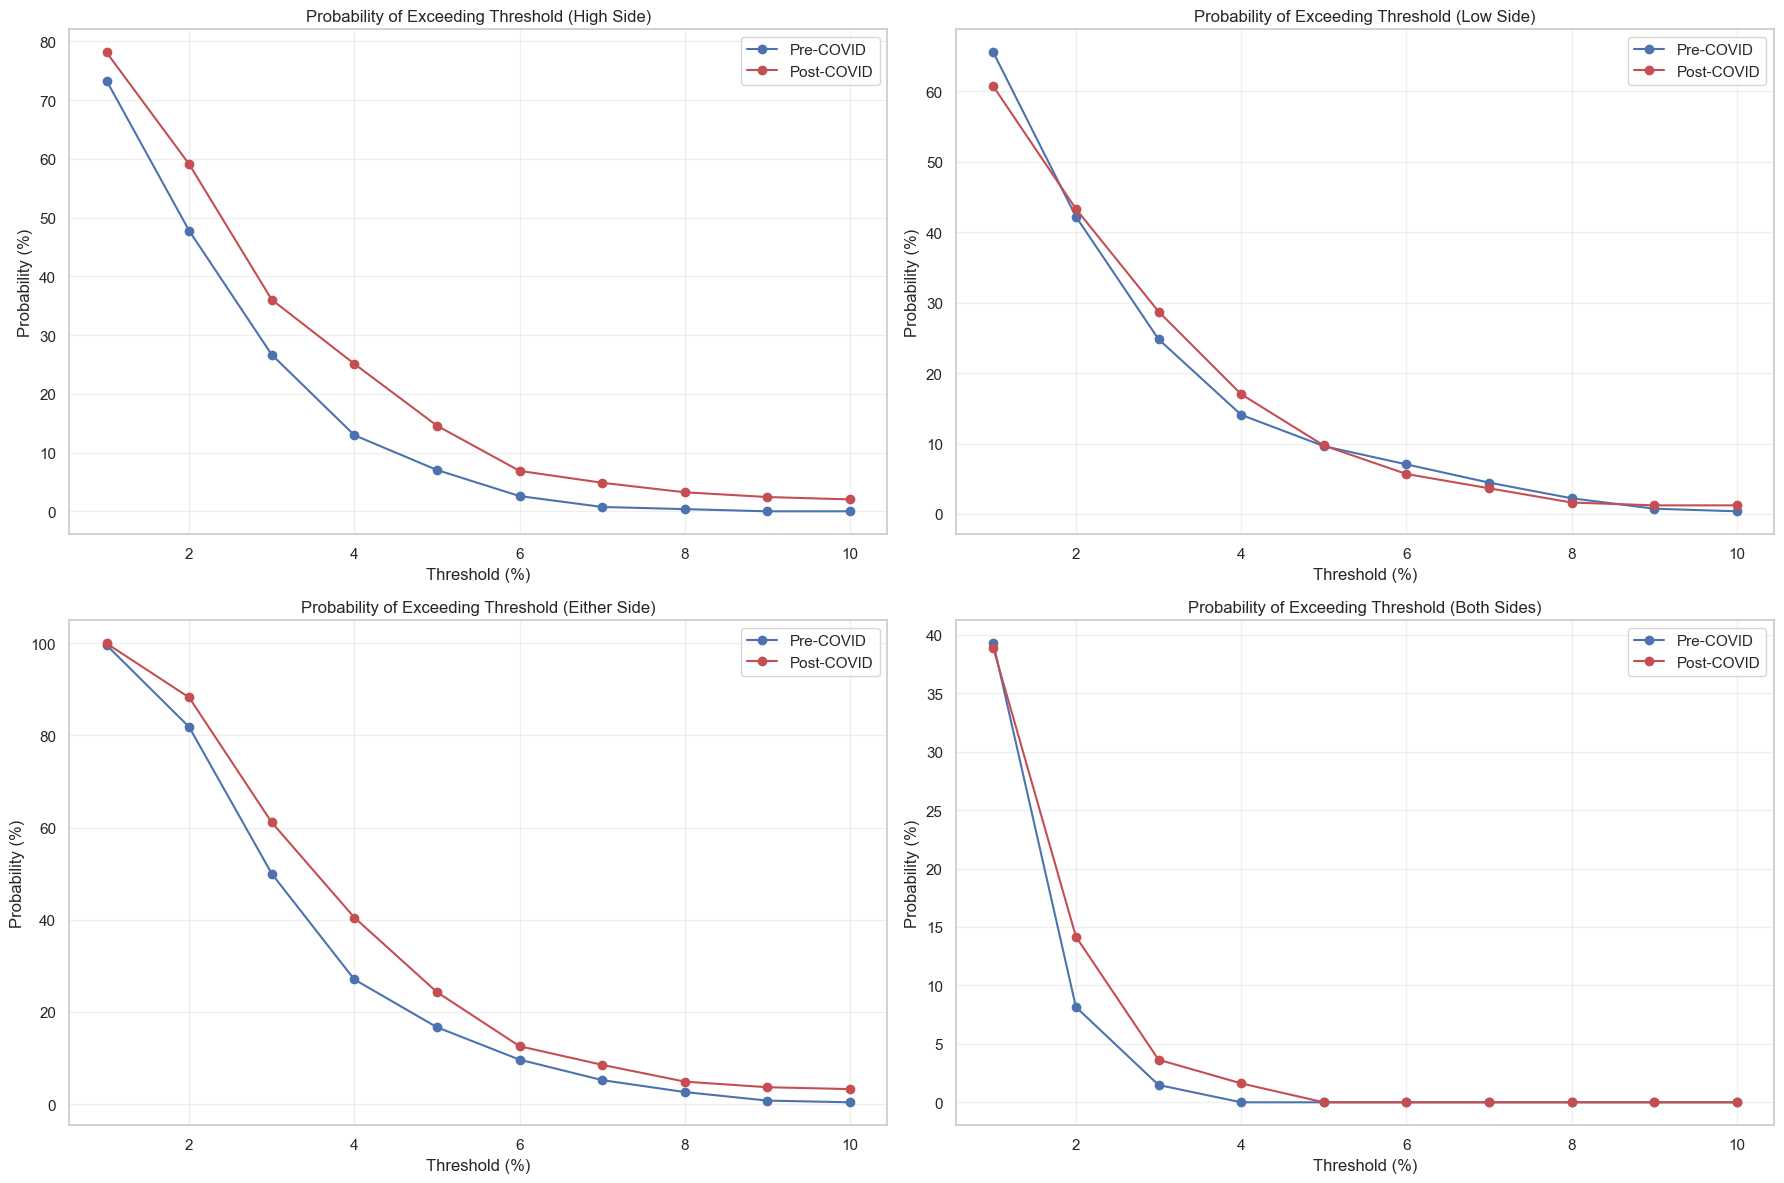

In [15]:


# --------------------------------------------------------------------------------
# Part 6: Probability Analysis for Option Strategies
# --------------------------------------------------------------------------------

print("\n\nPart 6: Probability Analysis for Option Strategies\n")

# Calculate probability of reaching certain thresholds by COVID era
thresholds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# For Pre-COVID
pre_covid_probs_high = [100 * (pre_covid_df['high_range_pct'] >= t).mean() for t in thresholds]
pre_covid_probs_low = [100 * (pre_covid_df['low_range_pct'] >= t).mean() for t in thresholds]
pre_covid_probs_either = [100 * ((pre_covid_df['high_range_pct'] >= t) | (pre_covid_df['low_range_pct'] >= t)).mean() for t in thresholds]
pre_covid_probs_both = [100 * ((pre_covid_df['high_range_pct'] >= t) & (pre_covid_df['low_range_pct'] >= t)).mean() for t in thresholds]

# For Post-COVID
post_covid_probs_high = [100 * (post_covid_df['high_range_pct'] >= t).mean() for t in thresholds]
post_covid_probs_low = [100 * (post_covid_df['low_range_pct'] >= t).mean() for t in thresholds]
post_covid_probs_either = [100 * ((post_covid_df['high_range_pct'] >= t) | (post_covid_df['low_range_pct'] >= t)).mean() for t in thresholds]
post_covid_probs_both = [100 * ((post_covid_df['high_range_pct'] >= t) & (post_covid_df['low_range_pct'] >= t)).mean() for t in thresholds]

# Create DataFrames for easy comparison
pre_covid_probs_df = pd.DataFrame({
    'Threshold': thresholds,
    'High Side': pre_covid_probs_high,
    'Low Side': pre_covid_probs_low,
    'Either Side': pre_covid_probs_either,
    'Both Sides': pre_covid_probs_both
})

post_covid_probs_df = pd.DataFrame({
    'Threshold': thresholds,
    'High Side': post_covid_probs_high,
    'Low Side': post_covid_probs_low,
    'Either Side': post_covid_probs_either,
    'Both Sides': post_covid_probs_both
})

# Display probability tables
print("Pre-COVID: Probability (%) of Exceeding Thresholds")
print(pre_covid_probs_df)

print("\nPost-COVID: Probability (%) of Exceeding Thresholds")
print(post_covid_probs_df)

# Plot probability comparison
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# High Side Probabilities
axes[0, 0].plot(thresholds, pre_covid_probs_high, 'bo-', label='Pre-COVID')
axes[0, 0].plot(thresholds, post_covid_probs_high, 'ro-', label='Post-COVID')
axes[0, 0].set_title('Probability of Exceeding Threshold (High Side)')
axes[0, 0].set_xlabel('Threshold (%)')
axes[0, 0].set_ylabel('Probability (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Low Side Probabilities
axes[0, 1].plot(thresholds, pre_covid_probs_low, 'bo-', label='Pre-COVID')
axes[0, 1].plot(thresholds, post_covid_probs_low, 'ro-', label='Post-COVID')
axes[0, 1].set_title('Probability of Exceeding Threshold (Low Side)')
axes[0, 1].set_xlabel('Threshold (%)')
axes[0, 1].set_ylabel('Probability (%)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Either Side Probabilities
axes[1, 0].plot(thresholds, pre_covid_probs_either, 'bo-', label='Pre-COVID')
axes[1, 0].plot(thresholds, post_covid_probs_either, 'ro-', label='Post-COVID')
axes[1, 0].set_title('Probability of Exceeding Threshold (Either Side)')
axes[1, 0].set_xlabel('Threshold (%)')
axes[1, 0].set_ylabel('Probability (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Both Sides Probabilities
axes[1, 1].plot(thresholds, pre_covid_probs_both, 'bo-', label='Pre-COVID')
axes[1, 1].plot(thresholds, post_covid_probs_both, 'ro-', label='Post-COVID')
axes[1, 1].set_title('Probability of Exceeding Threshold (Both Sides)')
axes[1, 1].set_xlabel('Threshold (%)')
axes[1, 1].set_ylabel('Probability (%)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()



Part 7: Option Strategy Backtest Simulation

Pre-COVID Option Strategy Backtest Results:
  Long Straddle Mean Long Straddle Win % Short Straddle Mean Short Straddle Win % Iron Condor Mean Iron Condor Win %
1           2.405299           98.148148           -2.405299             1.851852        -0.544444         48.518519
2           0.405299           51.481481           -0.405299            48.518519         1.155556         71.851852
3          -1.594701           17.407407            1.594701            82.592593         2.477778         82.592593
4          -3.594701            4.444444            3.594701            95.555556         3.733333             100.0
5          -5.594701             0.37037            5.594701             99.62963         4.866667             100.0

Post-COVID Option Strategy Backtest Results:
  Long Straddle Mean Long Straddle Win % Short Straddle Mean Short Straddle Win % Iron Condor Mean Iron Condor Win %
1           3.268193           96.356275    

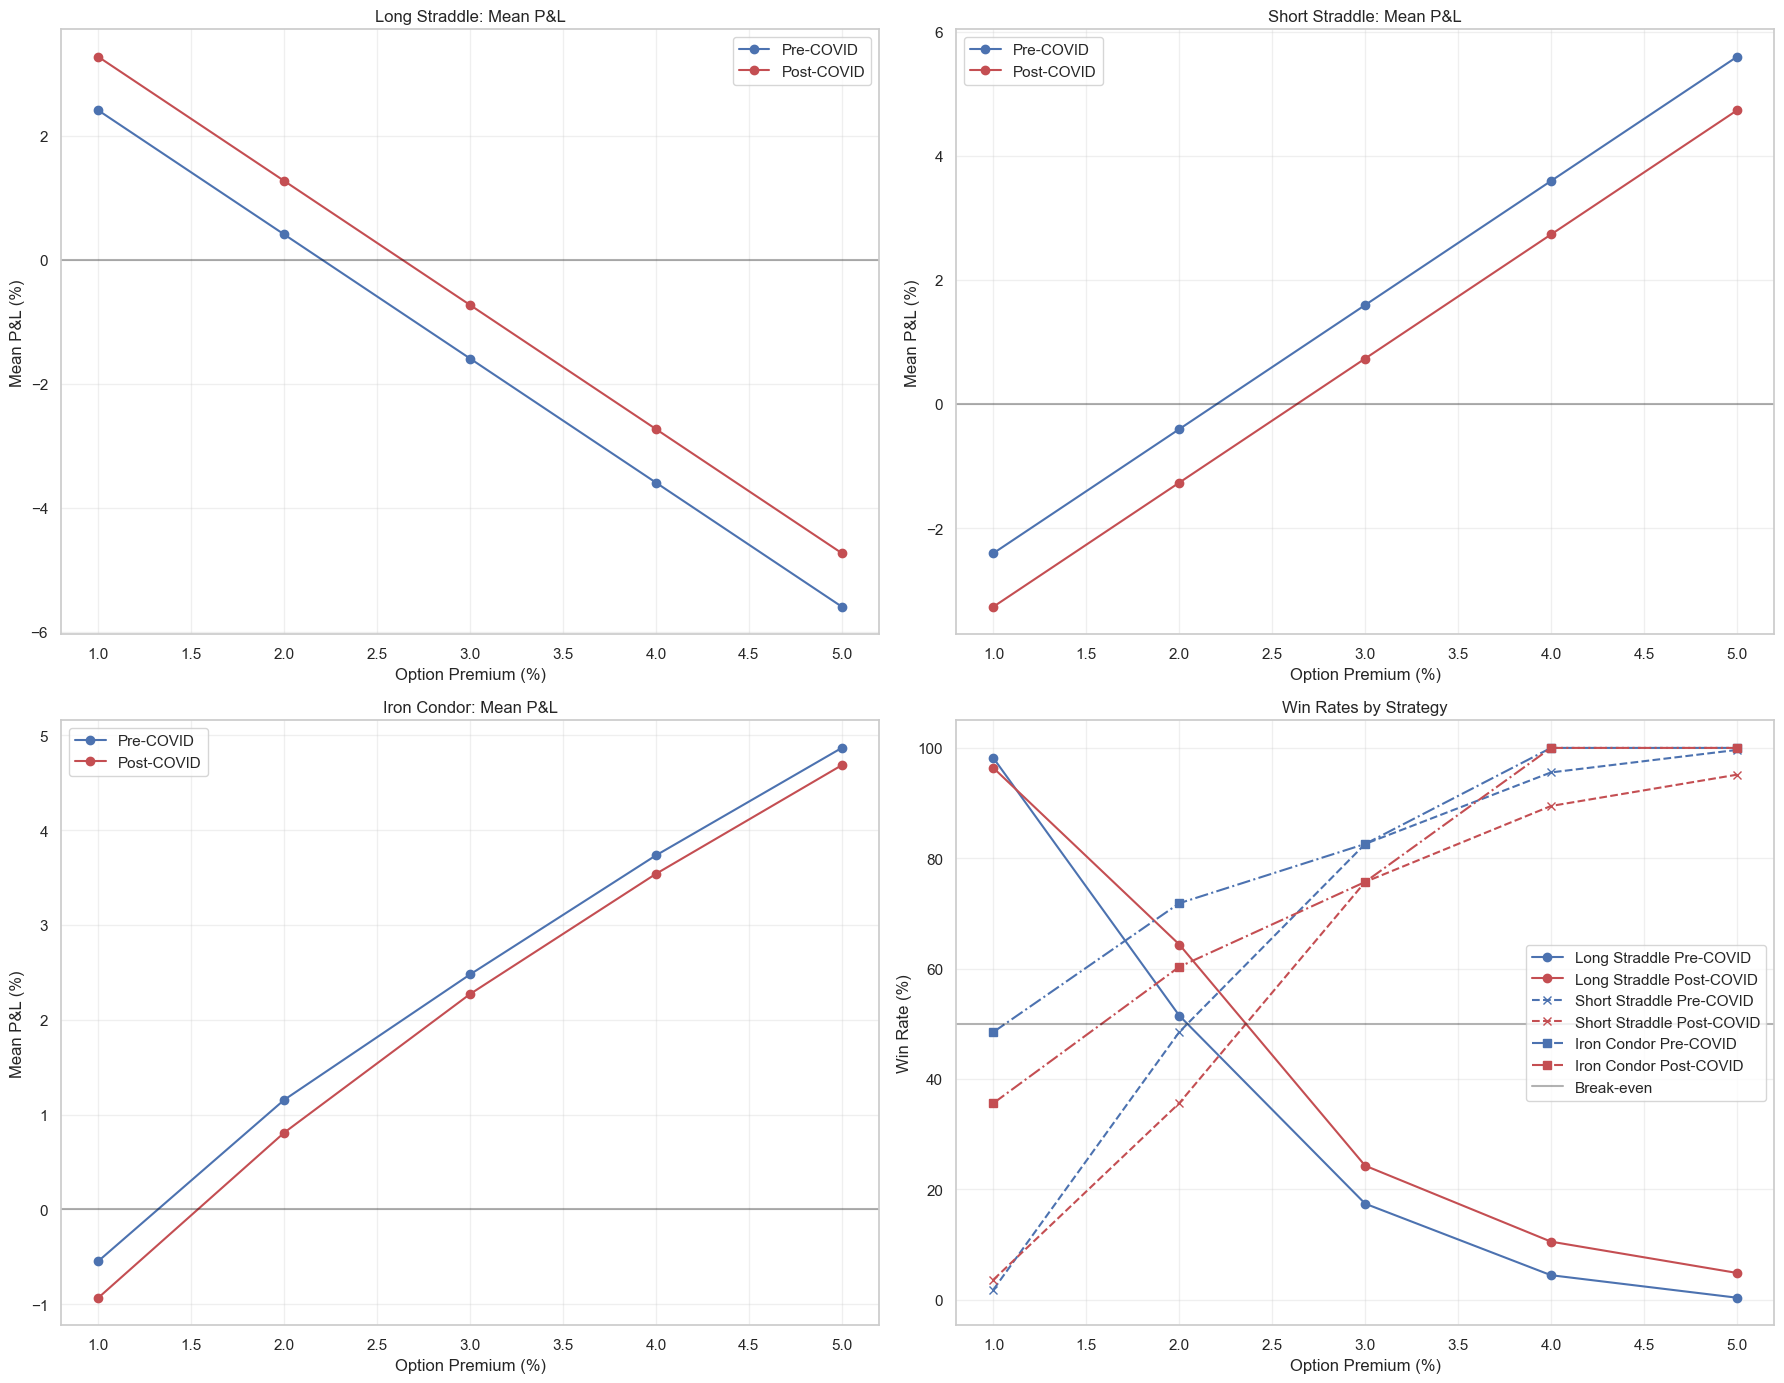

In [16]:


# --------------------------------------------------------------------------------
# Part 7: Option Strategy Backtest Simulation
# --------------------------------------------------------------------------------

print("\n\nPart 7: Option Strategy Backtest Simulation\n")

# Define parameters for simulating option strategies
# Simulating a Long Straddle (buying call and put at the same strike)

# Function to calculate P&L for a long straddle based on market move
def long_straddle_pnl(monday_price, range_pct, premium_pct):
    # Premium is given as percentage of Monday's price
    premium = monday_price * premium_pct / 100
    # Total cost for both options
    total_cost = 2 * premium
    # Absolute price movement
    price_move = monday_price * range_pct / 100
    # P&L = max(price_move - total_cost, -total_cost)
    pnl = max(price_move - total_cost, -total_cost)
    # Return as percentage of Monday's price
    return pnl / monday_price * 100

# Function to calculate P&L for short straddle
def short_straddle_pnl(monday_price, range_pct, premium_pct):
    # Just the negative of long straddle
    return -long_straddle_pnl(monday_price, range_pct, premium_pct)

# Function to calculate P&L for iron condor (selling range-bound strategy)
def iron_condor_pnl(monday_price, range_pct, premium_pct, wing_width_pct):
    # Premium is given as percentage of Monday's price
    premium = monday_price * premium_pct / 100
    # Width of the wings (distance between short and long strikes)
    wing_width = monday_price * wing_width_pct / 100
    # Absolute price movement
    price_move = monday_price * range_pct / 100
    
    # If price stays within breakeven points
    if price_move <= (premium + wing_width):
        return premium_pct
    else:
        # Loss is capped at the width of the wing minus the premium
        max_loss = wing_width - premium
        return -max_loss / monday_price * 100

# Simulate strategies across different premium assumptions
premium_assumptions = [1, 2, 3, 4, 5]  # As percentages of Monday's price
wing_width = 3  # For iron condor, percentage of price

# Create DataFrames to store backtest results
backtest_results_pre = pd.DataFrame(index=premium_assumptions, 
                                    columns=['Long Straddle Mean', 'Long Straddle Win %',
                                             'Short Straddle Mean', 'Short Straddle Win %',
                                             'Iron Condor Mean', 'Iron Condor Win %'])

backtest_results_post = pd.DataFrame(index=premium_assumptions, 
                                     columns=['Long Straddle Mean', 'Long Straddle Win %',
                                              'Short Straddle Mean', 'Short Straddle Win %',
                                              'Iron Condor Mean', 'Iron Condor Win %'])

# Run simulations for Pre-COVID
for premium in premium_assumptions:
    # Long Straddle
    pre_covid_df['ls_pnl'] = pre_covid_df.apply(
        lambda row: long_straddle_pnl(row['monday_close'], row['range_pct'], premium), axis=1)
    mean_ls_pnl = pre_covid_df['ls_pnl'].mean()
    win_rate_ls = (pre_covid_df['ls_pnl'] > 0).mean() * 100
    
    # Short Straddle
    pre_covid_df['ss_pnl'] = pre_covid_df.apply(
        lambda row: short_straddle_pnl(row['monday_close'], row['range_pct'], premium), axis=1)
    mean_ss_pnl = pre_covid_df['ss_pnl'].mean()
    win_rate_ss = (pre_covid_df['ss_pnl'] > 0).mean() * 100
    
    # Iron Condor
    pre_covid_df['ic_pnl'] = pre_covid_df.apply(
        lambda row: iron_condor_pnl(row['monday_close'], row['range_pct'], premium, wing_width), axis=1)
    mean_ic_pnl = pre_covid_df['ic_pnl'].mean()
    win_rate_ic = (pre_covid_df['ic_pnl'] > 0).mean() * 100
    
    # Store results
    backtest_results_pre.loc[premium] = [mean_ls_pnl, win_rate_ls, 
                                         mean_ss_pnl, win_rate_ss,
                                         mean_ic_pnl, win_rate_ic]

# Run simulations for Post-COVID
for premium in premium_assumptions:
    # Long Straddle
    post_covid_df['ls_pnl'] = post_covid_df.apply(
        lambda row: long_straddle_pnl(row['monday_close'], row['range_pct'], premium), axis=1)
    mean_ls_pnl = post_covid_df['ls_pnl'].mean()
    win_rate_ls = (post_covid_df['ls_pnl'] > 0).mean() * 100
    
    # Short Straddle
    post_covid_df['ss_pnl'] = post_covid_df.apply(
        lambda row: short_straddle_pnl(row['monday_close'], row['range_pct'], premium), axis=1)
    mean_ss_pnl = post_covid_df['ss_pnl'].mean()
    win_rate_ss = (post_covid_df['ss_pnl'] > 0).mean() * 100
    
    # Iron Condor
    post_covid_df['ic_pnl'] = post_covid_df.apply(
        lambda row: iron_condor_pnl(row['monday_close'], row['range_pct'], premium, wing_width), axis=1)
    mean_ic_pnl = post_covid_df['ic_pnl'].mean()
    win_rate_ic = (post_covid_df['ic_pnl'] > 0).mean() * 100
    
    # Store results
    backtest_results_post.loc[premium] = [mean_ls_pnl, win_rate_ls, 
                                          mean_ss_pnl, win_rate_ss,
                                          mean_ic_pnl, win_rate_ic]

# Display backtest results
print("Pre-COVID Option Strategy Backtest Results:")
print(backtest_results_pre)

print("\nPost-COVID Option Strategy Backtest Results:")
print(backtest_results_post)

# Visualize backtest results
# Mean P&L by Premium
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Long Straddle Mean P&L
axes[0, 0].plot(premium_assumptions, backtest_results_pre['Long Straddle Mean'], 'bo-', label='Pre-COVID')
axes[0, 0].plot(premium_assumptions, backtest_results_post['Long Straddle Mean'], 'ro-', label='Post-COVID')
axes[0, 0].set_title('Long Straddle: Mean P&L')
axes[0, 0].set_xlabel('Option Premium (%)')
axes[0, 0].set_ylabel('Mean P&L (%)')
axes[0, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Short Straddle Mean P&L
axes[0, 1].plot(premium_assumptions, backtest_results_pre['Short Straddle Mean'], 'bo-', label='Pre-COVID')
axes[0, 1].plot(premium_assumptions, backtest_results_post['Short Straddle Mean'], 'ro-', label='Post-COVID')
axes[0, 1].set_title('Short Straddle: Mean P&L')
axes[0, 1].set_xlabel('Option Premium (%)')
axes[0, 1].set_ylabel('Mean P&L (%)')
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Iron Condor Mean P&L
axes[1, 0].plot(premium_assumptions, backtest_results_pre['Iron Condor Mean'], 'bo-', label='Pre-COVID')
axes[1, 0].plot(premium_assumptions, backtest_results_post['Iron Condor Mean'], 'ro-', label='Post-COVID')
axes[1, 0].set_title('Iron Condor: Mean P&L')
axes[1, 0].set_xlabel('Option Premium (%)')
axes[1, 0].set_ylabel('Mean P&L (%)')
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Win Rates
axes[1, 1].plot(premium_assumptions, backtest_results_pre['Long Straddle Win %'], 'bo-', label='Long Straddle Pre-COVID')
axes[1, 1].plot(premium_assumptions, backtest_results_post['Long Straddle Win %'], 'ro-', label='Long Straddle Post-COVID')
axes[1, 1].plot(premium_assumptions, backtest_results_pre['Short Straddle Win %'], 'bx--', label='Short Straddle Pre-COVID')
axes[1, 1].plot(premium_assumptions, backtest_results_post['Short Straddle Win %'], 'rx--', label='Short Straddle Post-COVID')
axes[1, 1].plot(premium_assumptions, backtest_results_pre['Iron Condor Win %'], 'bs-.', label='Iron Condor Pre-COVID')
axes[1, 1].plot(premium_assumptions, backtest_results_post['Iron Condor Win %'], 'rs-.', label='Iron Condor Post-COVID')
axes[1, 1].set_title('Win Rates by Strategy')
axes[1, 1].set_xlabel('Option Premium (%)')
axes[1, 1].set_ylabel('Win Rate (%)')
axes[1, 1].axhline(y=50, color='black', linestyle='-', alpha=0.3, label='Break-even')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()



Part 8: Summary and Conclusions

Summary of Key Metrics - Pre-COVID vs Post-COVID:
                            Metric Pre-COVID Post-COVID Change (%)
0                    Total Range %      4.41       5.27     19.59%
1                   Upside Range %      2.19       2.86     30.65%
2                 Downside Range %      2.22       2.41      8.66%
3                      VIX Average     15.79      18.53     17.29%
4            VIX-Range Correlation      0.31       0.61     95.64%
5   Long Straddle P&L (3% Premium)     -1.59      -0.73    -54.11%
6  Short Straddle P&L (3% Premium)      1.59       0.73    -54.11%
7     Iron Condor P&L (3% Premium)      2.48       2.27     -8.33%


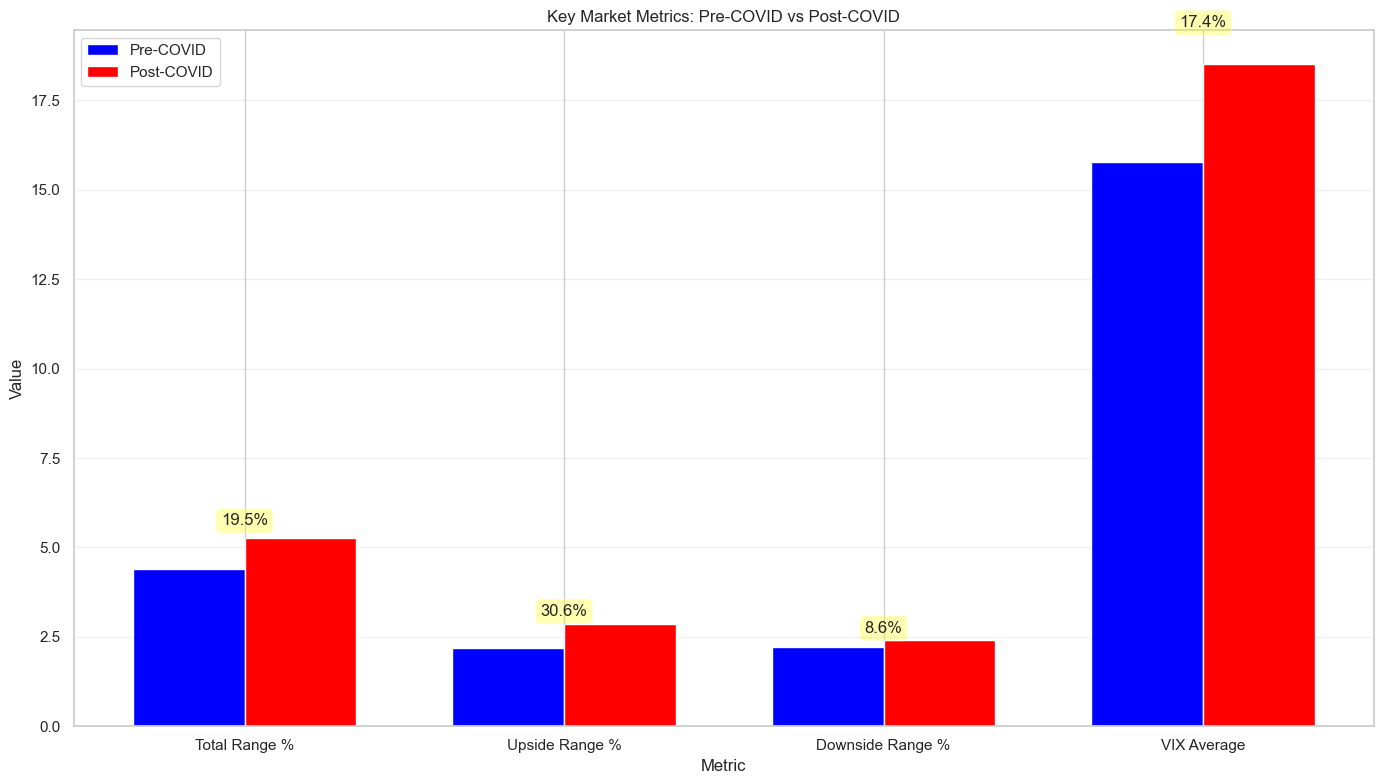


Saving results to disk...
Analysis complete! Results saved to the 'results' directory.


In [17]:


# --------------------------------------------------------------------------------
# Part 8: Summary and Conclusions
# --------------------------------------------------------------------------------

print("\n\nPart 8: Summary and Conclusions\n")

# Create a summary DataFrame with key metrics
summary_df = pd.DataFrame({
    'Metric': ['Total Range %', 'Upside Range %', 'Downside Range %', 
               'VIX Average', 'VIX-Range Correlation',
               'Long Straddle P&L (3% Premium)', 'Short Straddle P&L (3% Premium)',
               'Iron Condor P&L (3% Premium)'],
    'Pre-COVID': [pre_covid_df['range_pct'].mean(), 
                  pre_covid_df['high_range_pct'].mean(),
                  pre_covid_df['low_range_pct'].mean(),
                  pre_covid_merged['vix_close'].mean(),
                  corr_pre_covid.loc['vix_close', 'range_pct'],
                  backtest_results_pre.loc[3, 'Long Straddle Mean'],
                  backtest_results_pre.loc[3, 'Short Straddle Mean'],
                  backtest_results_pre.loc[3, 'Iron Condor Mean']],
    'Post-COVID': [post_covid_df['range_pct'].mean(), 
                   post_covid_df['high_range_pct'].mean(),
                   post_covid_df['low_range_pct'].mean(),
                   post_covid_merged['vix_close'].mean(),
                   corr_post_covid.loc['vix_close', 'range_pct'],
                   backtest_results_post.loc[3, 'Long Straddle Mean'],
                   backtest_results_post.loc[3, 'Short Straddle Mean'],
                   backtest_results_post.loc[3, 'Iron Condor Mean']],
    'Change (%)': [((post_covid_df['range_pct'].mean() / pre_covid_df['range_pct'].mean()) - 1) * 100,
                   ((post_covid_df['high_range_pct'].mean() / pre_covid_df['high_range_pct'].mean()) - 1) * 100,
                   ((post_covid_df['low_range_pct'].mean() / pre_covid_df['low_range_pct'].mean()) - 1) * 100,
                   ((post_covid_merged['vix_close'].mean() / pre_covid_merged['vix_close'].mean()) - 1) * 100,
                   ((corr_post_covid.loc['vix_close', 'range_pct'] / corr_pre_covid.loc['vix_close', 'range_pct']) - 1) * 100,
                   'N/A' if backtest_results_pre.loc[3, 'Long Straddle Mean'] == 0 
                   else ((backtest_results_post.loc[3, 'Long Straddle Mean'] / backtest_results_pre.loc[3, 'Long Straddle Mean']) - 1) * 100,
                   'N/A' if backtest_results_pre.loc[3, 'Short Straddle Mean'] == 0 
                   else ((backtest_results_post.loc[3, 'Short Straddle Mean'] / backtest_results_pre.loc[3, 'Short Straddle Mean']) - 1) * 100,
                   'N/A' if backtest_results_pre.loc[3, 'Iron Condor Mean'] == 0 
                   else ((backtest_results_post.loc[3, 'Iron Condor Mean'] / backtest_results_pre.loc[3, 'Iron Condor Mean']) - 1) * 100]
})

# Format numeric columns
summary_df['Pre-COVID'] = summary_df['Pre-COVID'].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
summary_df['Post-COVID'] = summary_df['Post-COVID'].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)
summary_df['Change (%)'] = summary_df['Change (%)'].apply(lambda x: f"{x:.2f}%" if isinstance(x, (int, float)) else x)

# Display summary
print("Summary of Key Metrics - Pre-COVID vs Post-COVID:")
print(summary_df)

# Plot key findings
plt.figure(figsize=(14, 8))
metrics = ['Total Range %', 'Upside Range %', 'Downside Range %', 'VIX Average']
pre_values = [float(summary_df.loc[summary_df['Metric'] == m, 'Pre-COVID'].values[0]) for m in metrics]
post_values = [float(summary_df.loc[summary_df['Metric'] == m, 'Post-COVID'].values[0]) for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, pre_values, width, label='Pre-COVID', color='blue')
plt.bar(x + width/2, post_values, width, label='Post-COVID', color='red')

plt.title('Key Market Metrics: Pre-COVID vs Post-COVID')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(x, metrics)
plt.grid(True, axis='y', alpha=0.3)
plt.legend()

# Add percentage change annotations
for i, (pre, post) in enumerate(zip(pre_values, post_values)):
    pct_change = ((post / pre) - 1) * 100
    plt.annotate(f"{pct_change:.1f}%", 
                 xy=(i, max(pre, post) * 1.05),
                 ha='center', va='bottom',
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

plt.tight_layout()
plt.show()

# Save important analysis results
print("\nSaving results to disk...")
results_path = "results/"
import os
if not os.path.exists(results_path):
    os.makedirs(results_path)

# Save summary
summary_df.to_csv(f"{results_path}summary_comparison.csv", index=False)

# Save probability tables
pre_covid_probs_df.to_csv(f"{results_path}pre_covid_probabilities.csv", index=False)
post_covid_probs_df.to_csv(f"{results_path}post_covid_probabilities.csv", index=False)

# Save backtest results
backtest_results_pre.to_csv(f"{results_path}pre_covid_strategy_backtest.csv")
backtest_results_post.to_csv(f"{results_path}post_covid_strategy_backtest.csv")

print("Analysis complete! Results saved to the 'results' directory.")